# Chapter 3 - Claims Problems

*It is natural to turn to the earliest surviving documents which deal with computation, and to study how people approached the subject nearly 4,000 years ago.*   
                                              
<p style="text-align: center;">- Donald Knuth, <i>Ancient Babylonian Algorithms</i></p>

*Thomas Schelling, co-laureate of the Nobel Prize in economics with Aumann, noted in the interview with Steelman that "The greatest advance in mathematics is the equal sign." It appears that another similarly valid statement can be made: "The greatest advance in interpersonal harmony is the equity concept."*  
                                              
<p style="text-align: center;">- Elishakoff and Begin-Drolet, <i>Talmudic Bankruptcy Problem</i></p>

*We know about two basic means of distribution: The first one can loosely be called ’socialistic’ and is associated with egalitarianism (everybody gets the same amount irrespective of the amount of the claim; we can be remined the verse of Russian poet Vladimir Mayakovsky: ”All that is yours, is mine, except the tooth brush!”). The other one can roughly be called ’capitalistic’, and is associated with proportional distribution (everybody
gets a proportional share of the estate for any size of the estate). The amazing fact that stems from the Talmudic division problem is that both are the two facets of the more general three-faceted phenomenon, and can be derived from the unified principle. The third facet is neither ’socialistic’ nor ’capitalistic.’*

<p style="text-align: center;">- Elishakoff and Begin-Drolet, <i>Talmudic Bankruptcy Problem</i></p>

*Throughout the maze of discussions in the talmud, one purpose stands out clealry: the Rabbis were always animated by a desire to develop a system of statutes and laws which are in essence just.*

<p style="text-align: center;">- Boaz Cohen, <i>Talmudic and Rabbinic Literature</i></p>

## What is Just?

In Book 5, chapters 3 and 4 of the *Nichomachean Ethics*, Aristotle claims that the just is equivalent to the proportional:

<blockquote>
This, then, is what the just is-the proportional; the unjust is what violates the proportion....
[The] justice which distributes common possessions is always in accordance with the kind of
proportion mentioned above;... and the injustice opposed to this kind of justice is that which
violates the proportion.
</blockquote>

In the context of a claims dispute involving two parties, many interpreters understand Aristotle to mean that the resolution of the dispute requires us to find awards $award_1$ and $award_2$ so that the usm of the awards equals the value of the disputed resource and $award_1 / claim_1 = award_2 / claim_2$ 

In his paper "What is Just?", Michel Balinski points out that the justification Aristotle provides for his position is circular:

<blockquote>
The unjust is what violates the proportion; for the proportional is intermediate,
and the just is proportional.
</blockquote>

Deuteronomy 6:18 is perhaps the most explicit exhortation found in the Torah towards justice:

<blockquote>
Do what is right and good in the sight of the Lord.
</blockquote>

How did the Rabbis understand this Biblical exhoration towards justice? Did they agree with Aristotle?

## Concede and Divide

The first Mishnah of Bava Metzia reads as follows:

<blockquote>
Two are holding a garment. One says, "I found it," and the other says, "I found it." One says, "all of it is mine" and the other says, "all of it is mine." This one takes an oath that he owns no less than half of it, and this one takes an oath that he owns no less than half of it, and they divide it [between them.]  

One says, "all of it is mine" and the other says "half of it is mine." The one who says "all of it is mine" takes an oath that he owns no less than three quarters of it; and the one who says "half of it is mine" takes an oath that he owns no less than one quarter of it. He [the former] takes three quarters and he [the latter] takes one quarter.
</blockquote>

In a case where one claims the entire garment and another claims one-third, Tosefta Bava Metziah 1:1 rules that the first receives 5/6 and the second receives 1/6

We can summarize these rulings as follows:

|Resource| Claim 1 | Claim 2 | Award 1 | Award 2 |
|--------|---------|--------------------|------------------|--------------------------|
| 100    | 100     | 100 | 50    | 50                      |
| 100    | 100     | 50  | 75    | 25                      |
| 100    | 100     | 33.3| 83.3  | 16.7                    |

We can think about the numbers mentioned in the Mishnah in terms of inputs and outputs. In particular, the inputs are the value of the garment and the list of claims against it. The outputs are the awards granted to each claimant.

Our challenge is now clear: given the two input/output pairs in our Mishnah, we must find a reasonable algorithm which agrees with the numbers in the Mishnah and also generalizes nicely to cases where the numbers are different.

In the context of a claims dispute, we call an input a *claims problem* and we call an output a *solution* to a claims problem. A function which associates each claims problem with a corresponding solution is called a *rule*.

A *claims problem* consists of two parts: the value of the disputed resource and a list of claims against the resource. We often package these two parts together into one ordered pair.

A *solution* is a list of awards to each claimant given in the same order as the list of claims.

For example, we can encode the claims problem and its solution mentioned in the second case of the Mishnah in Python as follows:

In [242]:
resource = 100
claims = [50, 100]

claims_problem = (resource, claims)

solution = [25, 75]

print('claims problem:', (claims_problem))
print('resource: ', resource)
print('claims:', claims)
print('solution:', solution)

claims problem: (100, [50, 100])
resource:  100
claims: [50, 100]
solution: [25, 75]


Our Mishnah in Bava Metizah may appear quaint, but it opens the door to a subject which is mammoth in its proportions: *distributive justice*.

Thomson describes claims problems as follows in *How to Divide When There Isn't Enough*, where $\mathbb{R}_+$ denotes the set of all non-negative real numbers:

<blockquote>
When a group of agents has claims on one infinitely divisuble resource that add up to more than what is available, how should the resource be divided? A “division rule,” or “rule” for short, associates with each such
"claims problem" a division among the claimants of the amount available... 

Only one good is to be allocated here and, for all agents, more is preferred
to less. Thus, agents’ preferences are the same and they do not appear explic-
itly in our model... 

No agent should be assigned more than their claim – and our focus is on situations where there is not enough to reach these bounds simultaneously. Also, we will not take into account the intensity of the satisfaction that claimants derive from their assignments, as captured by what are usually called "utility functions..."

Here is the formal model. An amount $E \in \mathbb{R}_+$ of an infinitely divisible resource, the **endowment**, has to be allocated among a **group** $N$ of agents having **claims** on it, $c_i \in \mathbb{R}_+$ being the claim of agent $i \in N$, our generic agent. Up to Chapter 10, we take $N$ to be a finite and fixed subset of the set of natural numbers $\mathbb{N}$, usually $\{1, \dots, n\}$. Using the notation $\mathbb{R}_+^N$ for the cross-product of $|N|$ copies of $\mathbb{R}_+$ indexed by the members of $N$, the claims vector 

$$
c \equiv (c_i)_{i \in N}
$$ 

is therefore an element of $\mathbb{R}_+^N$. To complete the model, we add that the endowment is not sufficient to fully honor all claims.

In summary, a claims problem, or simply a **problem**, is a pair $(c, E) \in \mathbb{R}_+^N \times \mathbb{R}_+$ such that 

$$
\sum c_i \geq E.
$$ 

Let $\mathcal{C}^N$ denote the domain of all problems...

One application, already mentioned, is to bankruptcy: there, E is the liquidation value of a bankrupt firm, and each coordinate of c represents the claim held against it by one of its creditors.

A closely related application is to estate division: a man dies and his estate is insufficient to cover the debts he leaves behind. How should it be divided among his creditors?...

The financial decisions faced by the organizer of a scientific meeting whose
budget is too limited to fully cover the expenses of all participants, a situation
familiar in academia, is another example.

Our next application is to rationing: a group of customers of a firm has placed orders for a good produced by the firm, but the total quantity it can supply turns out to be insufficient to satisfy everyone; orders can only be partially filled. Being able to demonstrate that it has done its best to be even-handed in dealing with the situation might help the firm remain on good terms with all of its customers. So how much should it assign to each of them?

The problem can also occur at the level of nations, when a scarce resource has to be distributed to states or provinces – food, clean water, medical supplies, or shares of the global carbon budget4 come to mind here – and at the multinational level. For instance, an international agency distributing aid to impoverished countries rarely has enough to cover all of these needs.

More generally, our model encompasses any situation in which some
amount of a resource has to be allocated among a group of agents when
that amount is insufficient to satisfy their commensurable claims, needs, or
demands...

The behavior of agents is often affected by informal agreements and subjective views of the situation they are facing, not just by objective factors. When claims are made in good faith, everyone involved may accept that they should be taken into consideration. 

In practice, expectations, beliefs, perceptions of fairness, and so on, play an important role in how agents respond to proposed settlements. Thus, the use of a rule whose good behavior can be demonstrated should contribute to dissipate conflicts, and help societies to function more smoothly...

We are tasked with identifying a list of “awards,” one for each claimant, whose sum is equal to the endowment. Instead of considering each problem separately, however, we will look for a general method of handling all problems – that is, for a function that associates with each problem a division of the endowment among the claimants. We will require that each claimant receive an amount that is nonnegative and at most as large as their claim. The division is to be thought of as a recommendation for the problem.

Formally, an **awards vector** for $(c, E) \in \mathcal{C}^N$ is a vector $x \in \mathbb{R}^N$ such that 

$$
0 \leq x \leq c
$$ 

and satisfying the **balance** requirement 

$$
\sum x_i = E.
$$ 

Let $X(c, E)$ be the set of awards vectors for $(c, E)$. A division rule, or simply a **rule**, is a function that associates with each claims problem $(c, E) \in \mathcal{C}^N$ an awards vector for it; that is, a vector in $X(c, E)$. Our generic notation for a rule is the letter $S$.
</blockquote>

In summary, a *claims problem* is an ordered pair $(c, E)$ where:
1. $c$ is a list of claims against the resource $E$.
2. The sum of the claims is greater then the value of the resource. 

To *solve* a claims problem we must find a list of “awards,” one for each claimant, whose sum is equal to the endowment.

We impose two conditions on an awards vector:
1. Each award is non-negative and no greater than the original claim.
2. The sum of all awards equals the value of the disputed resource.

A *division rule* or just a *rule* is a function that assigns a unique allocation to each bankruptcy problem.

A *division algorithm* is a machine that takes a claims problem as input and returns an awards vector as output. 

Some basic conditions must be satisfied before we can consider a claims problem. 

We can implement these in Python as follows:

In [243]:
def is_valid_claims_problem(resource, claims):
    """
    Determines if a claims problem is valid.

    Parameters:
    - resource (float): The available resource, must be non-negative.
    - claims (list of floats): A list of claims against the resource, each must be non-negative.

    Returns:
    - bool: True if it is a valid claims problem, False otherwise.
    """
    # Check if the resource is non-negative
    if resource < 0:
        return False

    # Check if claims is a non-empty list
    if not isinstance(claims, list) or len(claims) == 0:
        return False

    # Check if all claims are non-negative
    if any(claim < 0 for claim in claims):
        return False

    # Check if the total claims are greater than or equal to the resource
    if sum(claims) < resource:
        return False

    return True

resource = 100
claims = [50, 30, 40]
print(f"Claims problem with resource={resource} and claims={claims}: {is_valid_claims_problem(resource, claims)}")

resource = -10
claims = [50, 30, 40]
print(f"Claims problem with resource={resource} and claims={claims}: {is_valid_claims_problem(resource, claims)} (Reason: Resource is negative)")

resource = 100
claims = [50, -10, 40]
print(f"Claims problem with resource={resource} and claims={claims}: {is_valid_claims_problem(resource, claims)} (Reason: Contains negative claim)")

resource = 100
claims = [30, 20, 10]
print(f"Claims problem with resource={resource} and claims={claims}: {is_valid_claims_problem(resource, claims)} (Reason: Total claims are less than the resource)")

resource = 50
claims = []
print(f"Claims problem with resource={resource} and claims={claims}: {is_valid_claims_problem(resource, claims)} (Reason: Claims list is empty)")


Claims problem with resource=100 and claims=[50, 30, 40]: True
Claims problem with resource=-10 and claims=[50, 30, 40]: False (Reason: Resource is negative)
Claims problem with resource=100 and claims=[50, -10, 40]: False (Reason: Contains negative claim)
Claims problem with resource=100 and claims=[30, 20, 10]: False (Reason: Total claims are less than the resource)
Claims problem with resource=50 and claims=[]: False (Reason: Claims list is empty)


The first Mishnah in Bava Metziah raises the following quesitons:  

1. Exactly which algorithm does the Mishnah have in mind?
2. Why did the Mishnah prefer this algorithm over other possible algorithms?
3. Why did the Mishnah choose the numbers that it did over other possible numbers?
4. Why does the Mishnah limit itself to a case involving two claimants? 
5. What should be done in a case with arbitrarily many claimants?

In his paper "What is Just?", Michel Balinski offers an answer to the fourth question:

<blockquote>
Suppose that a good has been divided among a set of people in a manner that is "fair." Any subset of the participants could reasonably ask the question: Do our shares represent a "fair" division among us considered as a separate group? Suppose that they believed that a different division of their pooled shares would be more fair. In that case it would be possible to substitute this different division for their initial shares to obtain a new division among all that is "fairer" for the agents of the subset, and the same for all others. How could one then affirm that the initial division was fair to everyone? A rule that did this would surely be judged to be "incoherent"! The idea is captured in the slogan: "Any part of a fair division must be fair..."

it would be possible to substitute this different division for their initial shares to obtain
a new division among all that is "fairer" for the agents of the subset, and the same for all others. How could one then affirm that the initial division was fair to everyone? A rule that did this would surely be judged to be "incoherent"! The idea is captured in the slogan: "Any part of a fair division must be fair."

The rule is coherent when two properties hold: 

(i) the shares assigned to each of the agents of the subset by the original allocation is a suballocation and   
(ii) if there is another suballocation among the members of the subgroup, then another allocation of the rule to all the agents is found as follows: substitute the agent's shares in the suballocation for those they had in the original allocation...  

<b>Accepting the principle of coherence implies that to determine a rule for the fair division of goods or resources among any number of claimants it suffices to have a clear idea of what constitutes a fair division of those goods or resources between any two claimants.</b>
</blockquote>

We will need to do some leg work before we can fully appreciate Balinski's intent.

Two possible answers to the first question of which algorithm the Mishnah has in mind immediately spring to mind:

The first possibility is that the Mishnah has in mind a rule that dictates both claimants must suffer *equal losses* relative to their claims. The first person, asking for the whole garment but receiving three-quarters,
loses one-quarter; the second person also loses one-quarter, having asked for a half and received a quarter.

Rashi Bava Metziah 2a s.v. "And that one says" elaborates upon the second possibility:

<blockquote>
And that one says, "Half of it is mine": He concedes that the half belongs to his friend, so we only judge about half of it (which is what he is claiming). Therefore, "This one says, 'It is all mine,' he swears, etc." like the first verdict (i.e.: the first case in the mishnah). [And regarding] that which they are judging about (the other half), they both take an oath that he has at least half of it, and each one takes his half.
</blockquote>

According to Rashi, the logic of the Mishnah is that by claiming only 1/2 of the garment, the second claimant implicitly concedes the other 1/2 to the first claimant. The remaining 1/2 is then split evenly between the two claimants. The notion that an omission is equivalent to an admissions is reminiscent of a different Talmudic principle that silence in the face of an accusation is akin to an admission.

Written as a list of instructions, Rashi's *concede and divide* algorithm looks as follows:

1. Calculate how much each claimant concedes to the other.
2. Divide the remaining disputed portion such that it is split evenly between the claimants.
3. Give each claimant the amount conceded to him plus half the contested portion.

Taking a naive approach, we can implement Rahi's concede and divide algorithm follows:

In [244]:
def print_payoff_summary_with_two(resource, claim_1, claim_2, division_function):
    """
    Prints a summary of the resource, claims, and payoffs in tuple-like format.
    
    Parameters:
    - estate: Total estate value.
    - claim_1: Claim of the first claimant.
    - claim_2: Claim of the second claimant.
    - division_function: The function used to compute the division of the estate.
    """
    payoff = division_function(resource, claim_1, claim_2)
    
    print(f"Resource: {resource}")
    print(f"Claims: ({claim_1}, {claim_2})")
    print(f"Payoffs: {payoff}")
    print("-" * 30)

def concede_and_divide_with_two_naive(resource, claims):
        claim_1 = claims[0]
        claim_2 = claims[1]
        concession_of_one_to_two = resource - claim_1
        concession_of_two_to_one = resource - claim_2

        contested_portion = (
            resource - concession_of_one_to_two - concession_of_two_to_one
        )
        
        award_to_one = concession_of_two_to_one + contested_portion / 2
        award_to_two = concession_of_one_to_two + contested_portion / 2
    
        return award_to_one, award_to_two

We'll use the following convenience functions to help us print the results of applying a given rule to a claims problem:

In [245]:
def print_markdown_table(results, bids=False):
    """
    Prints a markdown-formatted table for resource allocation results with correct spacing.
    
    :param results: List of tuples containing (resource, claims, allocations)
    """
    max_claimants = max(len(claims) for _, claims, _ in results)

    if bids:
         headers = ["Total Loss"] + [f"Bid {i+1}" for i in range(max_claimants)] + \
                   [f"Loss {i+1}" for i in range(max_claimants)]
    else:
        headers = ["Resource"] + [f"Claim {i+1}" for i in range(max_claimants)] + \
                  [f"Award {i+1}" for i in range(max_claimants)]
    
    data = []
    for resource, claims, allocations in results:
        row = [str(resource)] + [str(claims[i]) if i < len(claims) else "" for i in range(max_claimants)] + \
              [str(allocations[i]) if i < len(allocations) else "" for i in range(max_claimants)]
        data.append(row)

    column_widths = [max(len(row[i]) for row in [headers] + data) for i in range(len(headers))]

    format_string = "| " + " | ".join(f"{{:<{w}}}" for w in column_widths) + " |"

    print(format_string.format(*headers))
    print("|-" + "-|-".join("-" * w for w in column_widths) + "-|")

    for row in data:
        print(format_string.format(*row))

def get_results_from_test_cases(test_cases, rule):
     return [(resource, claims, list(rule(resource, claims))) for resource, claims in test_cases]

test_cases = [
    (100, [100, 100]),
    (100, [50, 100]),
    (100, [100, 33.3]),
    (30, [100, 50])
]

results = get_results_from_test_cases(test_cases, concede_and_divide_with_two_naive)

print_markdown_table(results)

| Resource | Claim 1 | Claim 2 | Award 1 | Award 2 |
|----------|---------|---------|---------|---------|
| 100      | 100     | 100     | 50.0    | 50.0    |
| 100      | 50      | 100     | 25.0    | 75.0    |
| 100      | 100     | 33.3    | 83.35   | 16.65   |
| 30       | 100     | 50      | 40.0    | -10.0   |


In the last case above, something has gone wrong since the second claimant is awarded -10. None of the claimants in a claims problem should end up in debt as a result of the awards solution. 

Looking closer, we can see the problem is that the logic allows for a negative concession in the case that the resource is worth less than the given claim. In this case, the first claimant concedes -70 to the second, the second claimant concedes -20 to the first, and the contested portion is 30 + 90 = 120.

To remedy this, we re-implement the Mishnah's algorithm with a guard using Python's `max` function which prevents any concession from ever going below zero. This is equivalent to truncating the claims so that they cannot be larger than the value of the disputed resource.

In [246]:
def concede_and_divide_with_two(resource: float, claims: list[float]):
        claim_1 = claims[0]
        claim_2 = claims[1]
    
        # concessions cannot go below 0
        concession_of_one_to_two = max(resource - claim_1, 0) 
        concession_of_two_to_one = max(resource - claim_2, 0)

        contested_portion = (
            resource - concession_of_one_to_two - concession_of_two_to_one
        )

        half_the_contested_portion = contested_portion / 2
        
        allocation_to_one = round(half_the_contested_portion + concession_of_two_to_one, 2)
        allocation_to_two = round(half_the_contested_portion + concession_of_one_to_two, 2)
    
        return allocation_to_one, allocation_to_two

test_cases = [
    (100, [100, 100]),
    (100, [50, 100]),
    (100, [100, 33.3]),
    (30, [100, 50])
]

results = get_results_from_test_cases(test_cases, concede_and_divide_with_two)
print_markdown_table(results)


| Resource | Claim 1 | Claim 2 | Award 1 | Award 2 |
|----------|---------|---------|---------|---------|
| 100      | 100     | 100     | 50.0    | 50.0    |
| 100      | 50      | 100     | 25.0    | 75.0    |
| 100      | 100     | 33.3    | 83.35   | 16.65   |
| 30       | 100     | 50      | 15.0    | 15.0    |


The following Python function can be used to check whether or not a given solution to a claims problem makes sense:

In [247]:
def is_valid_allocation(resource, claims, awards):
    """
    Determines if an allocation vector is valid for a given claims problem.

    Parameters:
    - resource (float): The available resource, must be non-negative.
    - claims (list of floats): A list of claims against the resource, each must be non-negative.
    - allocations (list of floats): A list of allocations to the claimants.

    Returns:
    - bool: True if the allocation vector is valid, False otherwise.
    """
    # Check if claims and allocations are lists of the same length
    if not isinstance(claims, list) or not isinstance(awards, list):
        return False
    if len(claims) != len(awards):
        return False

    # Check if all claims and allocations are non-negative
    if any(c < 0 for c in claims) or any(a < 0 for a in awards):
        return False

    # Check if no allocation exceeds the corresponding claim
    if any(a > c for a, c in zip(awards, claims)):
        return False

    # Check if the sum of allocations equals the resource
    if sum(awards) != resource:
        return False

    return True

resource = 100
claims = [50, 30, 40]

print(f"resource: {resource}")
print(f"claims: {claims}", end="\n\n")
print("awards:", end="\n\n")

# Valid allocation vector
awards = [40, 30, 30]
print(f"{awards} {is_valid_allocation(resource, claims, awards)}")  # Output: True

# Invalid allocation vector (exceeds claim)
awards = [60, 30, 40]
print(f"{awards} {is_valid_allocation(resource, claims, awards)} (Reason: Allocation exceeds claim)")  # Output: False

# Invalid allocation vector (sum does not equal resource)
awards = [40, 30, 20]
print(f"{awards} {is_valid_allocation(resource, claims, awards)} (Reason: Sum does not equal resource)")  # Output: False

# Invalid allocation vector (negative value)
awards = [40, -10, 30]
print(f"{awards} {is_valid_allocation(resource, claims, awards)} (Reason: Contains negative allocation)")  # Output: False

# Invalid allocation vector (empty)
awards = []
print(f"{awards} {is_valid_allocation(resource, claims, awards)} (Reason: Empty allocations list)")  # Output: False


resource: 100
claims: [50, 30, 40]

awards:

[40, 30, 30] True
[60, 30, 40] False (Reason: Allocation exceeds claim)
[40, 30, 20] False (Reason: Sum does not equal resource)
[40, -10, 30] False (Reason: Contains negative allocation)
[] False (Reason: Empty allocations list)


We can visualize any rule by choosing a fixed list of claims, varying the value of the resource, and plotting how the awards change as the value of the resource changes from 0 to the sum of the claims. This results in an *awards graph of the rule for the list of claims*. 

In the following, we use the numbers from the Mishna's second case where the first claim is for 50 and the second is for 100 to fix the value of the claims. When we do so, the resulting awards graph looks as follows:

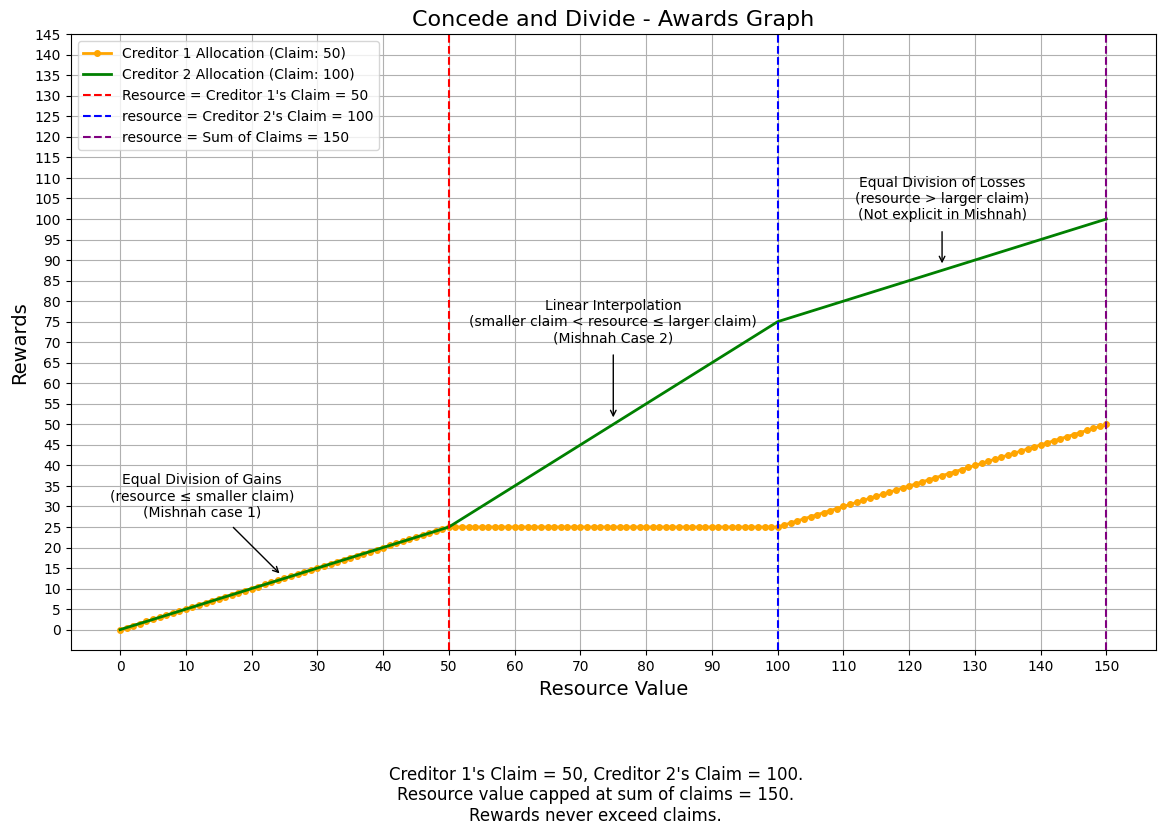

In [248]:
import matplotlib.pyplot as plt


def visualize_concede_and_divide(claim_1, claim_2):
    max_resource = claim_1 + claim_2

    resources = [e for e in range(0, max_resource + 1)]

    rewards_1 = []
    rewards_2 = []
    
    for resource in resources:
        allocation_to_one, allocation_to_two = concede_and_divide_with_two(resource, [claim_1, claim_2])
        rewards_1.append(allocation_to_one)
        rewards_2.append(allocation_to_two)

    plt.figure(figsize=(14, 8))

    plt.plot(resources, rewards_1, label=f"Creditor 1 Allocation (Claim: {claim_1})", linewidth=2, color='orange', marker='o', markersize=4)
    plt.plot(resources, rewards_2, label=f"Creditor 2 Allocation (Claim: {claim_2})", linewidth=2, color='green')

    plt.axvline(claim_1, color="red", linestyle="--", label=f"Resource = Creditor 1's Claim = {claim_1}")
    plt.axvline(claim_2, color="blue", linestyle="--", label=f"resource = Creditor 2's Claim = {claim_2}")
    plt.axvline(max_resource, color="purple", linestyle="--", label=f"resource = Sum of Claims = {max_resource}")

    arrow_length = 15

    plt.annotate(
        "Equal Division of Gains\n(resource ≤ smaller claim)\n(Mishnah case 1)", 
        xy=(claim_1 / 2, rewards_1[int(claim_1 / 2)]),  # Arrow points here
        xytext=(claim_1 / 4, rewards_1[int(claim_1 / 2)] + arrow_length),  # Text position
        arrowprops=dict(facecolor='black', arrowstyle="->", shrinkA=5, shrinkB=5),
        fontsize=10, color="black", ha="center"
    )

    plt.annotate(
        "Linear Interpolation\n(smaller claim < resource ≤ larger claim)\n(Mishnah Case 2)", 
        xy=(claim_1 + (claim_2 - claim_1) / 2, rewards_2[int(claim_1 + (claim_2 - claim_1) / 2)]),
        xytext=(claim_1 + (claim_2 - claim_1) / 2, rewards_2[int(claim_1)] + 45),
        arrowprops=dict(facecolor='black', arrowstyle="->", shrinkA=5, shrinkB=5),
        fontsize=10, color="black", ha="center"
    )

    plt.annotate(
        "Equal Division of Losses\n(resource > larger claim)\n(Not explicit in Mishnah)", 
        xy=(claim_2 + (max_resource - claim_2) / 2, rewards_2[int(claim_2 + (max_resource - claim_2) / 2)]),
        xytext=(claim_2 + (max_resource - claim_2) / 2, rewards_2[int(claim_2)] + arrow_length + 10),
        arrowprops=dict(facecolor='black', arrowstyle="->", shrinkA=5, shrinkB=5),
        fontsize=10, color="black", ha="center"
    )

    plt.xticks(range(0, max_resource + 10, 10))
    plt.yticks(range(0, claim_2 + 50, 5))

    plt.title("Concede and Divide - Awards Graph", fontsize=16)
    plt.xlabel("Resource Value", fontsize=14)
    plt.ylabel("Rewards", fontsize=14)
    plt.legend(loc="upper left")
    plt.grid(True)

    plt.figtext(0.5, -0.1, "Creditor 1's Claim = 50, Creditor 2's Claim = 100.\nResource value capped at sum of claims = 150.\nRewards never exceed claims.",
                wrap=True, horizontalalignment='center', fontsize=12, color="black")

    plt.show()

visualize_concede_and_divide(claim_1=50, claim_2=100)

Scanning from left to right, the concede and divide rule works quite differently in three distinct regimes depending on the value of the disputed resource.

In particular, The concede and divide rule stitches together three distinct rules: 
- Constrained equal awards (left-hand side). 
- Constrained equal losses (right-hand side). 
- A *linear interpolation* that connects the constrained equal awards rule with the constrained equal losses rule by *drawing a straight line* between the two rules (middle). 

Here, constrained equal awards means that no claimant can receive more than he claimed, and constrained equal losses means that no claimant can receive less than zero (i.e. no one can go into debt as a result of the adjudication).

### 1. Equal Division of Gains (Resource ≤ Smaller Claim)
- When the resource value is less than or equal to the smallest claim, neither party concedes any portion to the other.
- Each additional dollar of resource value results in equal gains*for both claimants.

### 2. Linear Interpolation (Smaller Claim < Resource ≤ Larger Claim)
- When the resource value is strictly greater than the smaller claim but less than or equal to the larger claim:
  - The smaller claimant concedes the amount exceeding their claim to the larger claimant.
  - The larger claimant concedes nothing in this regime.
  - Every additional dollar of resource value is allocated exclusively to the larger claimant.

### 3. Equal Division of Losses (Larger Claim < Resource < Sum of Claims)
- When the resource value is strictly greater than the largest claim but less than the total claims:
  - The smaller claimant concedes the resource amount exceeding their claim to the larger claimant.
  - The larger claimant also concedes the resource amount exceeding their claim to the smaller claimant.
- After this point, both claimants gain at the same rate, represented by the parallel increase in their payoff lines.

To better appreciate and contextualize the concede and divide rule, we need to consider some other rules found in ancient texts. Because the constrained equal losses rule is a competing candidate for the algorithm our Mishnah has in mind, we consider this rule next.

## Constrained Equal Losses

In *Laws of Appraisal and Devoted Property* Chapter 8, Section 4, Maimonidies writes:

> When consecrated property - whether landed property or movable property - is redeemed from the Temple treasury, we conduct an auction before all those who might seek to redeem it...
>  If, however, they all retracted at the same time, we divide the sum among them.
What is implied? The first one says: "I will [redeem] it for ten selaim," the second: "...for twenty," and a third "...for 24," and the second and third retract at the same time, we enable the first to redeem it for ten and we expropriate seven from the property of both the second and the third. Thus the Temple treasury collects 24. Similarly, if all three of them retract and the consecrated article is [ultimately] sold for three, we expropriate seven selaim from the property of all of them. These principles are followed in all instances.

In the above, Maimonidies describes what is now called the *constrained equal losses rule*. 

This rule makes losses as equal as possible subject to the constraint that no claimant goes into debt.

We can summarize Rambam's ruling as follows:

| Loss | Bid 1 | Bid 2 | Bid 3 | Loss 1 | Loss 2 | Loss 3
|------|-------|-------|-------|--------|--------|--------|
| 21   | 10    | 20    | 24    |   7    |   7    |   7    |

### Definition (Constrained Equal Losses)

For each $(c, E) \in C^N$, the Constrained Equal Losses Rule is defined as:

$$
CEL(c, E) = \sum_{i=1}^n \max(c_i - \lambda, 0)
$$

where $\lambda \in \mathbb{R}_+$ is chosen so as to satisfy the *balance requirement* that the total losses sum to the deficit of the estate, i.e., the remaining estate equals $E$ after applying the losses.

### Solving for Lambda

To explicitly solve for $\lambda$, we start with the defining equation:

$$
\sum_{i=1}^n \max(c_i - \lambda, 0) = E
$$

Here, the total awards are constrained by the total estate $E$, and the awards to each claimant are given by $\max(c_i - \lambda, 0)$, ensuring that no claimant receives less than $0$. The goal is to compute $\lambda$ such that the total awards exactly match the estate.

To make the computation tractable, we first sort the claims in *descending order*, denoted as:

$$
c_{1} \geq c_{2} \geq \cdots \geq c_{n}.
$$

Sorting allows us to systematically handle claims starting with the largest.

Next, we observe that regardless of the value of $\lambda$, claimants whose claims are less than or equal to $\lambda$ receive nothing (i.e. $\text{Award}_i = 0$), while the remaining claimants receive the portion of their claims exceeding $\lambda$ (i.e. $\text{Award}_i = c_i - \lambda$).

As a result, we can break the total awards into two components:
1. The sum of the claims exceeding $\lambda$: $\sum_{j=1}^k (c_{j} - \lambda)$, where $k$ is the number of claimants whose claims exceed $\lambda$ ($c_{j} > \lambda$).
2. The contribution from the remaining $n-k$ claimants, each receiving $0$.

Ignoring the rewards which sum to zero, the total awards become:

$$
\sum_{j=1}^k (c_{j} - \lambda) = E
$$

We expand this as:

$$
\sum_{j=1}^k (c_{j} - \lambda) = \sum_{j=1}^k c_{j} - \sum_{j=1}^k \lambda
$$

Thus, the equation becomes:

$$
\sum_{j=1}^k c_{j} - k \cdot \lambda = E
$$

To solve for $\lambda$, first move the term $k \cdot \lambda$ to the right-hand side:

$$
\sum_{j=1}^k c_{j} - E = k \cdot \lambda
$$

Then, we divide both sides of the equation by $k$ to isolate $\lambda$:

$$
\lambda = \frac{\sum_{j=1}^k c_{j} - E}{k}
$$

To find the correct value of $k$, we start with all claimants ($k = n$) and compute $\lambda$. If $\lambda \geq c_{k+1}$, the solution is valid, and we stop. If not, we reduce $k$ by 1 and repeat the computation. This ensures $\lambda$ satisfies the constraints of the problem.

In [249]:
def compute_lambda_for_losses(estate, claims):
    """
    Compute the value of lambda for the Constrained Equal Losses (CEL) Rule
    using the closed-form expression.

    k is the number of claimants who are still "losing" (i.e., have claims above lambda).

    Parameters:
    - estate (float): Total estate to be divided.
    - claims (list of floats): List of claims by creditors.

    Returns:
    - float: The computed value of lambda.
    """
    sorted_claims = sorted(claims, reverse=True)  # Sort in descending order
    n = len(sorted_claims)

    for k in range(n):
        # Calculate lambda for the remaining claimants
        lambda_value = (sum(sorted_claims[:k + 1]) - estate) / (k + 1)

        # Check if lambda is valid for the next claim
        if k == n - 1 or lambda_value >= sorted_claims[k + 1]:
            return lambda_value

    return 0  # Fallback in case of incorrect inputs

def constrained_equal_losses_using_lambda(estate, claims):
    """
    Compute the awards vector for the Constrained Equal Losses (CEL) Rule
    by leveraging the compute_lambda_for_losses function.

    Parameters:
    - estate (float): Total estate to be divided.
    - claims (list of floats): List of claims by creditors.

    Returns:
    - list of floats: Awards vector according to the CEL rule.
    """
    lambda_value = compute_lambda_for_losses(estate, claims)
    awards = [max(claim - lambda_value, 0) for claim in claims]

    return [round(award, 2) for award in awards]

test_cases = [
    (100, [100, 100]),
    (100, [50, 100]),
    (100, [100, 33.3]),
]

results = get_results_from_test_cases(test_cases, constrained_equal_losses_using_lambda)
print_markdown_table(results)

| Resource | Claim 1 | Claim 2 | Award 1 | Award 2 |
|----------|---------|---------|---------|---------|
| 100      | 100     | 100     | 50.0    | 50.0    |
| 100      | 50      | 100     | 25.0    | 75.0    |
| 100      | 100     | 33.3    | 83.35   | 16.65   |


We can compute the constrained equal losses without explicitly solving for $\lambda$ using the following algorithm:

1. Initially, all agents are active, and each agent gets his full claim.
2. While the total allocation is larger than the estate:
3. Remove one unit equally from all active agents.
4. Each agent whose total allocation drops to zero becomes inactive.

This iterative adjustment ensures that the following conditions are satisfied:
1. The total awards equal the estate ($\sum \text{Awards}_i = E$).
2. No claimant receives a negative award.

In [250]:
def constrained_equal_losses(E, claims):
    """
    Calculate the awards vector according to the constrained equal losses (CEL) rule.

    Parameters:
    E (float): Total estate to be divided.
    claims (list of floats): List of claims by creditors.

    Returns:
    list of floats: Awards vector according to the CEL rule.
    """
    n = len(claims)
    # Start by assuming each claimant receives their full claim
    awards = claims[:]  
    # Total shortfall to distribute as losses
    remaining_shortfall = sum(claims) - E  

    while remaining_shortfall > 0:
        # Calculate equal loss for each claimant still eligible
        active_claimants = [i for i in range(n) if awards[i] > 0]
        number_of_active_claimants = len(active_claimants)

        if number_of_active_claimants == 0:
            break

        equal_loss = remaining_shortfall / number_of_active_claimants

        for i in active_claimants:
            if awards[i] > equal_loss:
                awards[i] -= equal_loss
                remaining_shortfall -= equal_loss
            else:
                # If the loss would reduce the award below zero, cap it at zero
                remaining_shortfall -= awards[i]
                awards[i] = 0
    return [round(award, 2) for award in awards]


test_cases = [
    (100, [100, 100]),
    (100, [50, 100]),
    (100, [100, 33.3]),
]

results = get_results_from_test_cases(test_cases, constrained_equal_losses_using_lambda)
print_markdown_table(results)


| Resource | Claim 1 | Claim 2 | Award 1 | Award 2 |
|----------|---------|---------|---------|---------|
| 100      | 100     | 100     | 50.0    | 50.0    |
| 100      | 50      | 100     | 25.0    | 75.0    |
| 100      | 100     | 33.3    | 83.35   | 16.65   |


Now that we can compute constrained equal losses, we can leverage it to compute the numbers mentioned by Maimonidies:

In [251]:
def constrained_equal_payments(total_to_collect, capacities):
    """
    Distributes a total 'total_to_collect' across payers with
    maximum capacities, making their payments as equal as possible.
    Returns the vector of payments.
    """
    total_capacities = sum(capacities)
    if total_to_collect >= total_capacities:
        return capacities

    E = total_capacities - total_to_collect
    awards = constrained_equal_losses(E, capacities)
    payments = [capacity - award for capacity, award in zip(capacities, awards)]
    return payments

test_cases = [
    (21, [10, 20, 24])
]

results = get_results_from_test_cases(test_cases, constrained_equal_payments)
print_markdown_table(results, bids=True)

| Total Loss | Bid 1 | Bid 2 | Bid 3 | Loss 1 | Loss 2 | Loss 3 |
|------------|-------|-------|-------|--------|--------|--------|
| 21         | 10    | 20    | 24    | 7.0    | 7.0    | 7.0    |


We can visualize contstrained equal losses as follows:

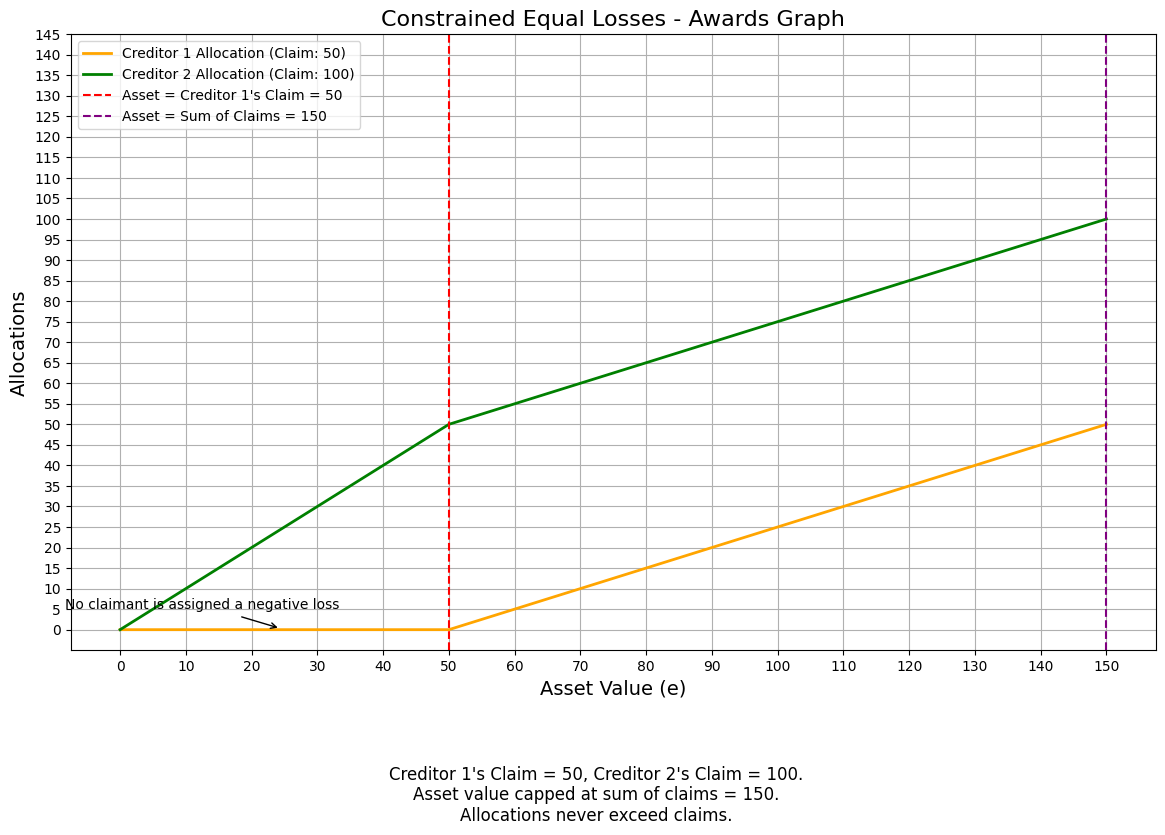

In [252]:
import matplotlib.pyplot as plt


def visualize_constrained_equal_losses_with_two(claim_1, claim_2):
    max_asset = claim_1 + claim_2

    asset_values = [e for e in range(0, max_asset + 1)]

    allocations_1 = []
    allocations_2 = []
    
    for asset in asset_values:
        allocation_to_one, allocation_to_two = constrained_equal_losses(asset, [claim_1, claim_2])
        allocations_1.append(allocation_to_one)
        allocations_2.append(allocation_to_two)

    # Plot the results
    plt.figure(figsize=(14, 8))

    # Plot allocations
    plt.plot(asset_values, allocations_1, label=f"Creditor 1 Allocation (Claim: {claim_1})", linewidth=2, color='orange')
    plt.plot(asset_values, allocations_2, label=f"Creditor 2 Allocation (Claim: {claim_2})", linewidth=2, color='green')

    # Add vertical lines for key checkpoints
    plt.axvline(claim_1, color="red", linestyle="--", label=f"Asset = Creditor 1's Claim = {claim_1}")    
    plt.axvline(max_asset, color="purple", linestyle="--", label=f"Asset = Sum of Claims = {max_asset}")

    # Balanced arrows and annotations
    arrow_length = 5  # Fixed arrow length for consistency

    plt.annotate(
        "No claimant is assigned a negative loss", 
        xy=(claim_1 / 2, allocations_1[int(claim_1 / 2)]),  # Arrow points here
        xytext=(claim_1 / 4, allocations_1[int(claim_1 / 2)] + arrow_length),  # Text position
        arrowprops=dict(facecolor='black', arrowstyle="->", shrinkA=5, shrinkB=5),
        fontsize=10, color="black", ha="center"
    )

    plt.xticks(range(0, max_asset + 10, 10))  # X-axis ticks every 10
    plt.yticks(range(0, claim_2 + 50, 5))    # Y-axis ticks every 10

    # Labels and legend
    plt.title("Constrained Equal Losses - Awards Graph", fontsize=16)
    plt.xlabel("Asset Value (e)", fontsize=14)
    plt.ylabel("Allocations", fontsize=14)
    plt.legend(loc="upper left")
    plt.grid(True)

    # Add text at the bottom to clarify constant claims
    plt.figtext(0.5, -0.1, "Creditor 1's Claim = 50, Creditor 2's Claim = 100.\nAsset value capped at sum of claims = 150.\nAllocations never exceed claims.",
                wrap=True, horizontalalignment='center', fontsize=12, color="black")

    plt.show()

# Visualize with vertical line at sum of claims
visualize_constrained_equal_losses_with_two(claim_1=50, claim_2=100)

We can better see the difference between the concede and divide rule and the constrained equal losses rule by plotting them side by side:

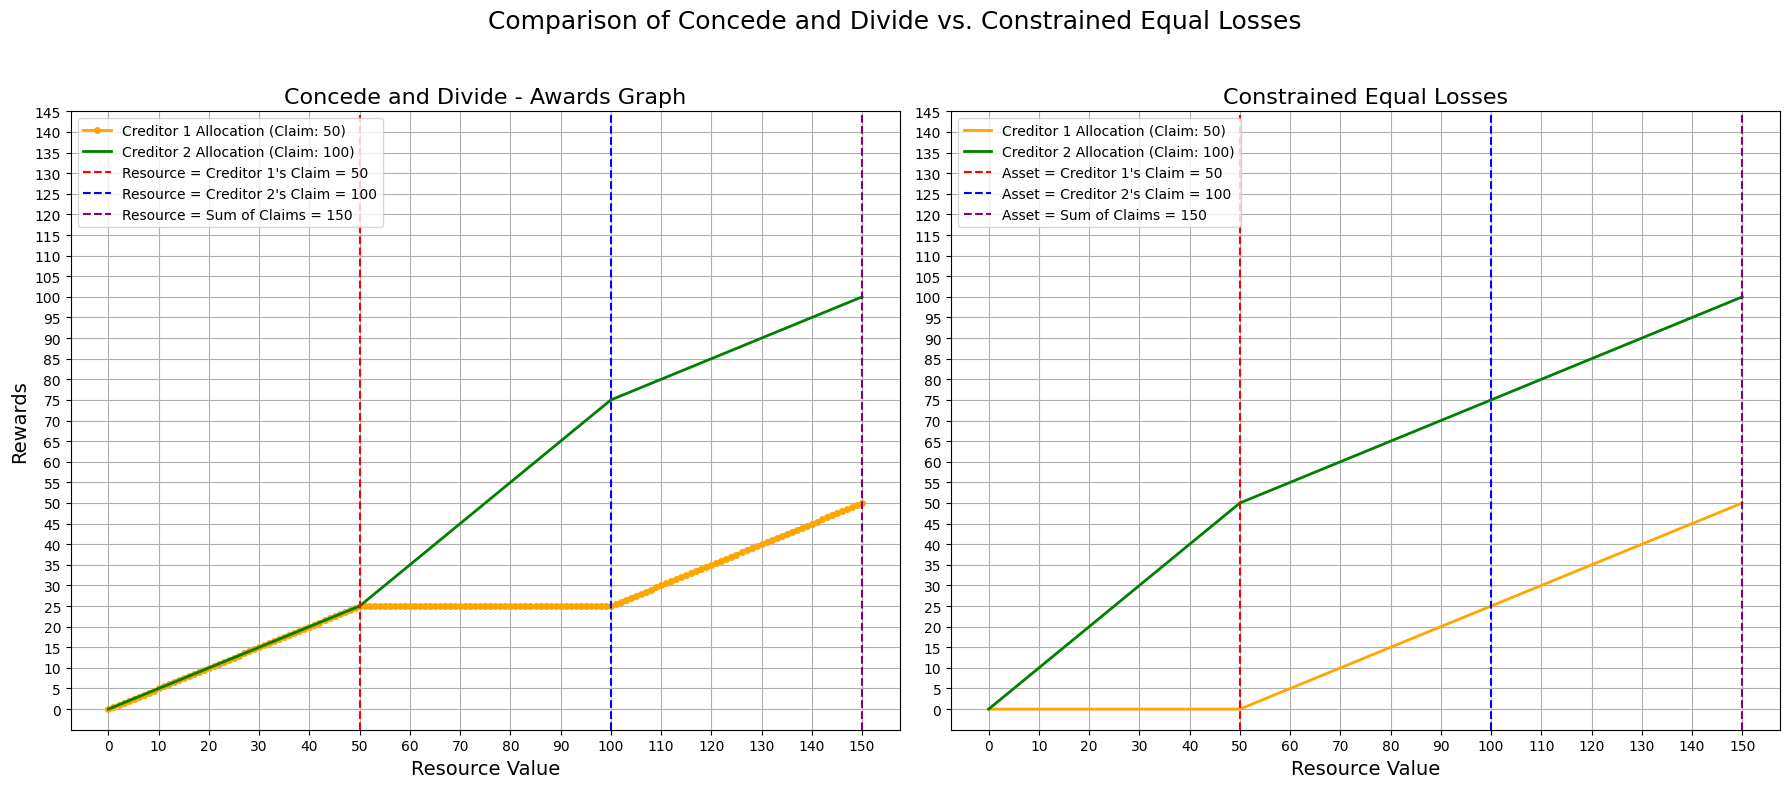

In [253]:
import matplotlib.pyplot as plt

def visualize_rules_side_by_side(claim_1, claim_2):
    max_resource = claim_1 + claim_2
    resources = list(range(0, max_resource + 1))
    
    # --- Compute data for Concede and Divide ---
    rewards_1_cad = []  # Creditor 1 rewards
    rewards_2_cad = []  # Creditor 2 rewards
    for resource in resources:
        allocation_to_one, allocation_to_two = concede_and_divide_with_two(resource, [claim_1, claim_2])
        rewards_1_cad.append(allocation_to_one)
        rewards_2_cad.append(allocation_to_two)
    
    # --- Compute data for Constrained Equal Losses ---
    rewards_1_cel = []  # Creditor 1 allocations
    rewards_2_cel = []  # Creditor 2 allocations
    for resource in resources:
        allocation_to_one_cel, allocation_to_two_cel = constrained_equal_losses(resource, [claim_1, claim_2])
        rewards_1_cel.append(allocation_to_one_cel)
        rewards_2_cel.append(allocation_to_two_cel)
        
    # --- Create subplots ---
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), sharex=True, sharey=True)
    
    # ===== Left subplot: Concede and Divide =====
    ax1.plot(resources, rewards_1_cad, label=f"Creditor 1 Allocation (Claim: {claim_1})",
             linewidth=2, color='orange', marker='o', markersize=4)
    ax1.plot(resources, rewards_2_cad, label=f"Creditor 2 Allocation (Claim: {claim_2})",
             linewidth=2, color='green')
    
    # Add vertical lines for key resource values
    ax1.axvline(claim_1, color="red", linestyle="--", label=f"Resource = Creditor 1's Claim = {claim_1}")
    ax1.axvline(claim_2, color="blue", linestyle="--", label=f"Resource = Creditor 2's Claim = {claim_2}")
    ax1.axvline(max_resource, color="purple", linestyle="--", label=f"Resource = Sum of Claims = {max_resource}")

    
    # Formatting for the left plot
    ax1.set_title("Concede and Divide - Awards Graph", fontsize=16)
    ax1.set_xlabel("Resource Value", fontsize=14)
    ax1.set_ylabel("Rewards", fontsize=14)
    ax1.legend(loc="upper left")
    ax1.grid(True)
    
    # ===== Right subplot: Constrained Equal Losses =====
    ax2.plot(resources, rewards_1_cel, label=f"Creditor 1 Allocation (Claim: {claim_1})",
             linewidth=2, color='orange')
    ax2.plot(resources, rewards_2_cel, label=f"Creditor 2 Allocation (Claim: {claim_2})",
             linewidth=2, color='green')
    
    # Vertical lines for key asset values
    ax2.axvline(claim_1, color="red", linestyle="--", label=f"Asset = Creditor 1's Claim = {claim_1}")
    ax2.axvline(claim_2, color="blue", linestyle="--", label=f"Asset = Creditor 2's Claim = {claim_2}")
    ax2.axvline(max_resource, color="purple", linestyle="--", label=f"Asset = Sum of Claims = {max_resource}")
    
    # Formatting for the right plot
    ax2.set_title("Constrained Equal Losses", fontsize=16)
    ax2.set_xlabel("Resource Value", fontsize=14)
    ax2.legend(loc="upper left")
    ax2.grid(True)
    
    # Set consistent ticks for both subplots
    for ax in (ax1, ax2):
        ax.set_xticks(range(0, max_resource + 10, 10))
        ax.set_yticks(range(0, claim_2 + 50, 5))

    # Force y-axis tick labels to appear on both subplots
    ax1.tick_params(axis='y', labelleft=True)
    ax2.tick_params(axis='y', labelleft=True)
    
    # Overall title and layout adjustments
    fig.suptitle("Comparison of Concede and Divide vs. Constrained Equal Losses", fontsize=18)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


# === Call the combined visualization function ===
visualize_rules_side_by_side(claim_1=50, claim_2=100)


In the above side-by-side comparson, notice that the two rules agree whenever the value of the disputed resource is greater than or equal to the value of the largest claim. Although both rules can explain the numbers in our Mishnah, the two rules lead to different outcomes when we change the numbers. This renews our question: why is Rashi so confident that our Mishanh has in mind the concede and divide rule rather than the constraind equal losses rule if both rules can be used to expalin the numbers in our Mishnah?

## Proportional Rule

In book V chapter III of his Nichomachean Ethics, Aristotle writes:

> This, then, is what the just is -- the proportional; the unjust is what violates the proportion. 

### Deriving an Equation for the Proportional Rule

We are given a claims dispute involving two parties with claims $claim_1$ and $claim_2$. 

The proportional resolution requires finding awards $award_1$ and $award_2$ such that:

1. The total awards sum to the available resource $E$:

   $$
   award_1 + award_2 = E
   $$

2. The awards are proportional to the claims:

   $$
   \frac{award_1}{claim_1} = \frac{award_2}{claim_2} = \lambda
   $$

   for some proportionality factor $\lambda$.

From the proportionality condition, we obtain the two equations:

   $$
   \frac{award_1}{claim_1} = \lambda 
   $$
   
   and   
   
   $$
   \frac{award_2}{claim_2} = \lambda.
   $$

Multiplying both sides of each of the equation by the claim in the denominator, we express each award as:

$$
award_1 = \lambda \cdot claim_1, \quad award_2 = \lambda \cdot claim_2.
$$

Substituting these into the balance equation, we get:

$$
\lambda claim_1 + \lambda claim_2 = E.
$$

Factoring out $\lambda$ we get:

$$
\lambda (claim_1 + claim_2) = E.
$$

Solving for $\lambda$ gives us:

$$
\lambda = \frac{E}{claim_1 + claim_2}.
$$

For a general claims problem $(c, E) \in C^N$, where $c = (c_1, c_2, \dots, c_n)$  represents the claims of $N$ claimants, we apply the same reasoning:

- The balance requirement says the sum of claims must equal the value of the estate:

  $$
  \sum_{i=1}^{N} x_i = E.
  $$

- The proportionality condition says that each award divided by its corresponding claim equals the same number:

  $$
  \frac{x_i}{c_i} = \lambda, \quad \forall i \in N.
  $$

Thus, each award is given by:

$$
x_i = \lambda c_i.
$$

This gives us the following definition for the proportional rule:

#### Definition (Proportional Rule)
For a claims problem $(c, E) \in C^N$, the proportional rule $P$ determines the awards vector as:
$$
P(c, E) = \lambda c,
$$
where $\lambda \in \mathbb{R}_+$ (a proportionality factor) is chosen to ensure the **balance requirement**:
$$
\sum x_i = E.
$$

We solve this equation for $\lambda$ as follows:

The balance requirement states that the total awards must equal the estate:

$$
\sum_{i=1}^n x_i = E
$$

Substitute $x_i = \lambda c_i$ into the balance equation to obtain:

$$
\sum_{i=1}^n \lambda c_i = E
$$

Factor out $\lambda$:

$$
\lambda \sum_{i=1}^n c_i = E
$$

Divide both sides by $\sum_{i=1}^n c_i$ (the sum of the claims):

$$
\lambda = \frac{E}{\sum_{i=1}^n c_i}
$$

In other words, the proportionality constant is obtained by dividing the value of the contested resource by the sum of the claims against that resource.

We can compute the proportionality rule in Python as follows:

In [254]:
def proportional_rule(resource, claims):
    """
    Calculates the awards vector according to the proportional rule.

    Parameters:
    E (float): Total resource to be divided.
    claims (list of floats): List of claims by creditors.

    Returns:
    list of floats: Awards vector proportional to claims.
    """
    sum_of_claims = sum(claims)

    if sum_of_claims == 0:
        return [0] * len(claims)

    proportionality_factor = resource / sum_of_claims
    rewards = [round(proportionality_factor * claim, 2) for claim in claims]

    return rewards

test_cases = [
    (100, [100, 100]),
    (100, [50, 100]),
    (100, [100, 33.3]),
]

results = get_results_from_test_cases(test_cases, proportional_rule)
print_markdown_table(results)

| Resource | Claim 1 | Claim 2 | Award 1 | Award 2 |
|----------|---------|---------|---------|---------|
| 100      | 100     | 100     | 50.0    | 50.0    |
| 100      | 50      | 100     | 33.33   | 66.67   |
| 100      | 100     | 33.3    | 75.02   | 24.98   |


The awards graph for the proportional rule looks as follows:

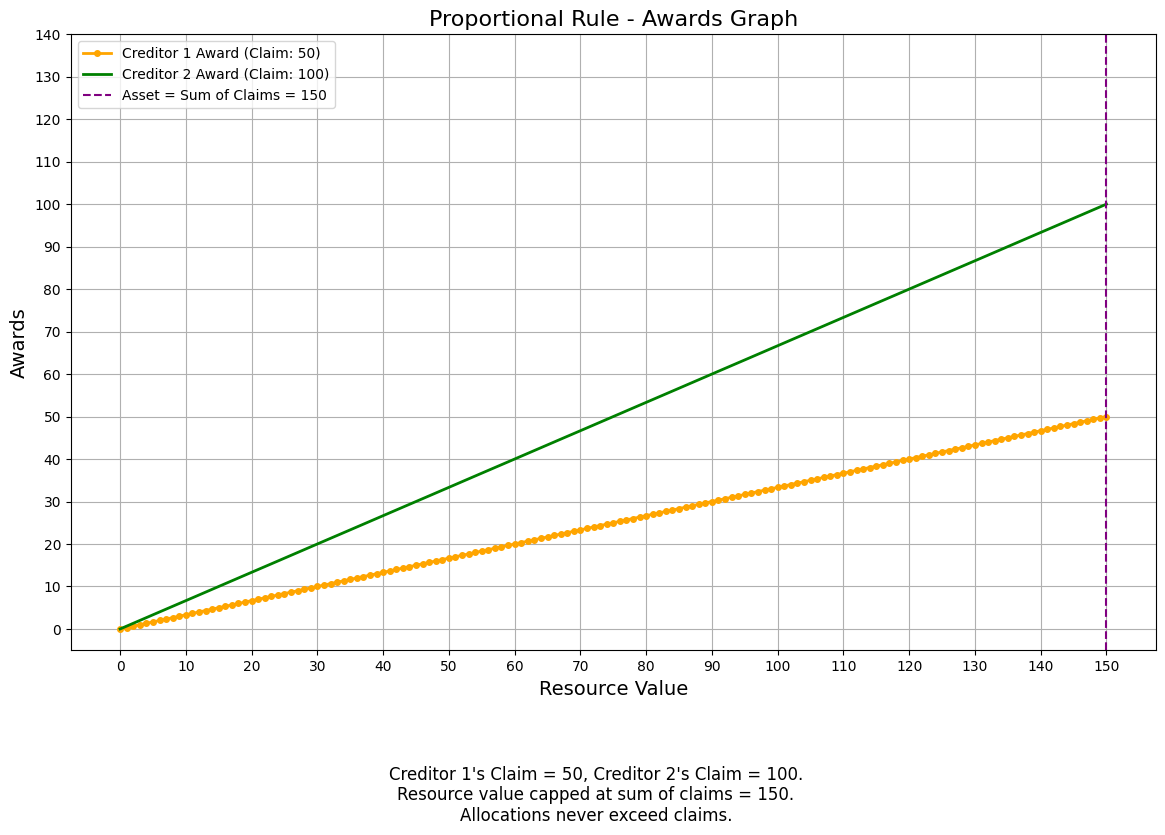

In [255]:
import matplotlib.pyplot as plt


def visualize_proportional_awards_with_two(claim_1, claim_2):
    max_asset = claim_1 + claim_2

    asset_values = [e for e in range(0, max_asset + 1)]

    allocations_1 = []
    allocations_2 = []
    
    for asset in asset_values:
        allocation_to_one, allocation_to_two = proportional_rule(asset, [claim_1, claim_2])
        allocations_1.append(allocation_to_one)
        allocations_2.append(allocation_to_two)

    # Plot the results
    plt.figure(figsize=(14, 8))

    # Plot allocations
    plt.plot(asset_values, allocations_1, label=f"Creditor 1 Award (Claim: {claim_1})", linewidth=2, color='orange', marker='o', markersize=4)
    plt.plot(asset_values, allocations_2, label=f"Creditor 2 Award (Claim: {claim_2})", linewidth=2, color='green')

    # Add vertical lines for key checkpoints
    plt.axvline(max_asset, color="purple", linestyle="--", label=f"Asset = Sum of Claims = {max_asset}")

    # Balanced arrows and annotations
    arrow_length = 15  # Fixed arrow length for consistency

    plt.xticks(range(0, max_asset + 10, 10))  # X-axis ticks every 10
    plt.yticks(range(0, claim_2 + 50, 10))    # Y-axis ticks every 10

    # Labels and legend
    plt.title("Proportional Rule - Awards Graph", fontsize=16)
    plt.xlabel("Resource Value", fontsize=14)
    plt.ylabel("Awards", fontsize=14)
    plt.legend(loc="upper left")
    plt.grid(True)

    # Add text at the bottom to clarify constant claims
    plt.figtext(0.5, -0.1, "Creditor 1's Claim = 50, Creditor 2's Claim = 100.\nResource value capped at sum of claims = 150.\nAllocations never exceed claims.",
                wrap=True, horizontalalignment='center', fontsize=12, color="black")

    plt.show()

# Visualize with vertical line at sum of claims
visualize_proportional_awards_with_two(claim_1=50, claim_2=100)

From the above, we can see that the award grows faster for a larger claims as $E$ increases. We can see this mathematically as follows:

The proportional rule assigns awards as:

$$x_i = \lambda c_i$$

where:

$$\lambda = \frac{E}{\sum c_i}.$$

Thus, each award is given by:

$$x_i = \frac{E}{\sum c_i} \cdot c_i.$$

Rewriting this in slope-intercept form, we get:

$$x_i = \left(\frac{c_i}{\sum c_i}\right) E.$$

This represents a linear equation of the form:

$$x_i = m_i E,$$

where $m_i$ is the slope.

Comparing with the standard equation of a line $y = mx$, we identify the slope of creditor $i$'s award line as:

$$m_i = \frac{c_i}{\sum c_i}.$$

We can see from the above equation that as the claim grows larger in the numerator, the slope increases accordingly.

Proportional division can be understood as a form of equal division. Instead of treating each claims as indivisble, we collect all of the claims in one aggregate and temporarliy forget about where each claim came from. We then derive how much of the resource is deserved per unit of claim by equally dividin the resource by the total number of claims. The claimants receive partial payments corresponding to the number of claim units held by each of them.

## Constrained Equal Awards

In *Laws of Lending and Borrowing, Chapter 20, Section 4*, Maimonidies writes:

<blockquote>
If [dividing the property into equal portions] would give the person owed the least more than he is owed, [this is what should be done]: We divide the sum [equally among the creditors], so that the person owed the least will receive the money he is owed. [He then withdraws.] The remaining creditors then divide the balance [of the debtor’s resources] in the following manner.  

What is implied? [A person] owed three debts: one of a maneh (100 zuz), one for 200 and one for 300. If all [the resources to the debtor] total 300 [zuz], they are divided 100 for each. Similarly, if [his resources are less than 300], they should be divided equally [among the three].

If [his resource] total more than 300 [zuz], the 300 should be divided equally and then the person owed 100 should withdraw. The remaining money should be divided equally in this same manner.

What is implied? If [the debtor’s resources] total 500 or less, the 300 should be divided equally, and then the person owed 100 should withdraw. The balance of 200 or less should then be divided equally [among the remaining
creditors], and then the second one withdraws.

If [the debtor’s resources] total 600, the 300 should be divided equally, and then the person owed 100 should withdraw. They then divide 200 between the two equally, and then the second one withdraws. The 100 that remains
should be given to the person owed 300; he thus receives only 300.
</blockquote>

These rulings can be summarized as follows:

| Resource Value | Claim 1 | Claim 2 | Claim 3 | Award to Claim 1 | Award to Claim 2 | Award to Claim 3 |
|--------------------|--------|--------|--------|------------------|------------------|------------------|
| 300              | 100    | 200    | 300    | 100              | 100              | 100              |
| 400              | 100    | 200    | 300    | 100              | 150              | 150              |
| 500              | 100    | 200    | 300    | 100              | 200              | 200              |
| 600              | 100    | 200    | 300    | 100              | 200              | 300              |


In the above, Maimonidies describes what is now called the *constrained equal awards rule*. 

This rule makes awards as equal as possible subject to the constraint that no claimant receives more than his claim.

#### Definition (Constrained Equal Awards)

For each $(c, E) \in C^N$, the Constrained Equal Awards Rule is defined as:

$$
\sum_{i=1}^n \min(c_i, \lambda) = E
$$

where $\lambda \in \mathbb{R}_+$ is chosen so as to satisfy the *balance requirement* that the awards sum to the value of the estate.

In other words, to compute the constrained equal awards solution, we must find a constant $\lambda$ such that each claimant receives either exactly their claim or $\lambda$, whichever is smaller. After doing this comparison and allocation for each claimant, the total awards equal the value of the disputed resource.

### Solving for Lambda

To explicitly solve for $\lambda$, we start with the defining equation:

$$
\sum_{i=1}^n \min(c_i, \lambda) = E
$$

Here, the total awards are constrained by the total estate $E$, and the awards to each claimant are given by $\min(c_i, \lambda)$, ensuring no claimant receives more than their claim $c_i$. The goal is to compute $\lambda$ such that the total awards exactly match the estate.

To make the computation tractable, we first sort the claims in *ascending order*, denoted as: 

$c_{1} \leq c_{2} \leq \cdots \leq c_{n}$. 

Sorting allows us to systematically handle claims starting with the smallest.

Next, we observe that regardless of the value of $\lambda$, claimants whose claims are less than or equal to $\lambda$ receive their full claims (i.e. $\text{Award}_i = c_i$), while the remaining claimants receive exactly $\lambda (i.e. \text{Award}_i = \lambda)$. 

As a result, we can break the total awards into two components:
1. The sum of the fully satisfied claims: $\sum_{j=1}^k c_{(j)}$, where $k$ is the number of claimants whose claims are fully satisfied ($c_{(j)} \leq \lambda$).
2. The contribution from the remaining $n-k$ claimants, each receiving $\lambda$: $(n-k) \cdot \lambda$.

Thus, the total awards become:

$$
\sum_{j=1}^k c_{(j)} + (n-k) \cdot \lambda = E
$$

Rearranging this equation allows us to isolate $\lambda$:

$$
\lambda = \frac{E - \sum_{j=1}^k c_{(j)}}{n-k}
$$

This formula provides a way to compute $\lambda$ once $k$, the number of fully satisfied claimants, is determined. 

To find $k$, we start with $k = 0$ (no claimants are fully satisfied) and compute $\lambda$. If $\lambda \leq c_{(k+1)}$, the solution is valid, and we stop. If $\lambda > c_{(k+1)}$, the next smallest claim ($c_{(k+1)}$) is fully satisfied, so $k$ is incremented, and the process repeats.

This iterative adjustment ensures that $\lambda$ satisfies the conditions of the problem:
1. The total awards equal the estate ($\sum \text{Awards}_i = E$).
2. No claimant receives more than their claim ($\text{Award}_i \leq c_i$).

By iterating over $k$ and updating $\lambda$ at each step, we arrive at the final value of $\lambda$ and the corresponding awards vector. This method ensures fairness and compliance with the rules of the constrained equal awards problem.


We can implement this in Python as follows:

In [256]:
def compute_lambda_for_awards(estate, claims):
    """
    Compute the value of lambda for the Constrained Equal Awards (CEA) Rule
    using the closed-form expression.

    k is the number of fully satisfied claimants
    n − k is the number of claimants who have not been fully satisfied,

    Parameters:
    - estate (float): Total estate to be divided.
    - claims (list of floats): List of claims by creditors.

    Returns:
    - float: The computed value of lambda.
    """
    sorted_claims = sorted(claims)
    n = len(sorted_claims)
    
    sum_of_satisfied_claims = 0

    for k in range(n):
        lambda_value = (estate - sum_of_satisfied_claims) / (n - k)
        
        # Check if lambda is valid for the next claim
        if k == n - 1 or lambda_value <= sorted_claims[k]:
            return lambda_value
        
        sum_of_satisfied_claims += sorted_claims[k]

    return 0  # Fallback in case of incorrect inputs

def constrained_equal_awards_using_lambda(estate, claims):
    """
    Compute the awards vector for the Constrained Equal Awards (CEA) Rule
    by leveraging the compute_lambda function.

    Parameters:
    - estate (float): Total estate to be divided.
    - claims (list of floats): List of claims by creditors.

    Returns:
    - list of floats: Awards vector according to the CEA rule.
    """
    lambda_value = compute_lambda_for_awards(estate, claims)
    awards = [min(claim, lambda_value) for claim in claims]

    return awards

test_cases = [
    (300, [100, 200, 300]),
    (400, [100, 200, 300]),
    (500, [100, 200, 300]),
    (600, [100, 200, 300]),
]

results = get_results_from_test_cases(test_cases, constrained_equal_awards_using_lambda)
print_markdown_table(results)

| Resource | Claim 1 | Claim 2 | Claim 3 | Award 1 | Award 2 | Award 3 |
|----------|---------|---------|---------|---------|---------|---------|
| 300      | 100     | 200     | 300     | 100     | 100.0   | 100.0   |
| 400      | 100     | 200     | 300     | 100     | 150.0   | 150.0   |
| 500      | 100     | 200     | 300     | 100     | 200     | 200.0   |
| 600      | 100     | 200     | 300     | 100     | 200     | 300     |


We can compute the constrained equal awards without explicitly solving for $\lambda$ using the following algorithm:

1. Initially, all agents are active, and all agents get 0.
2. While there are remaining units of the estate:
3. The next estate unit is divided equally among all active agents.
4. Each agent whose total allocation equals its claim becomes inactive.

This iterative adjustment ensures that the following conditions are satisfied:
1. The total awards equal the estate ($\sum \text{Awards}_i = E$).
2. No claimant receives more than their claim ($\text{Award}_i \leq c_i$).

In [257]:
def constrained_equal_awards(E, claims):
    """
    Calculate the awards vector according to the constrained equal awards (CEA) rule.

    Parameters:
    E (float): Total estate to be divided.
    claims (list of floats): List of claims by creditors.

    Returns:
    list of floats: Awards vector according to the CEA rule.
    """
    n = len(claims)
    awards = [0] * n
    remaining_claims = claims[:]
    remaining_estate = E

    while remaining_estate > 0 and any(remaining_claims):
        # Calculate equal division share
        n = sum(1 for claim in remaining_claims if claim > 0)
        if n == 0:
            break

        equal_share = remaining_estate / n

        for i in range(len(remaining_claims)):
            if remaining_claims[i] > 0:
                # Award the minimum of equal share or remaining claim
                allocation = min(equal_share, remaining_claims[i])
                awards[i] += allocation
                remaining_estate -= allocation
                remaining_claims[i] -= allocation

    return [round(award, 2) for award in awards]

test_cases = [
    (300, [100, 200, 300]),
    (400, [100, 200, 300]),
    (500, [100, 200, 300]),
    (600, [100, 200, 300]),
]

results = get_results_from_test_cases(test_cases, constrained_equal_awards)
print_markdown_table(results)


| Resource | Claim 1 | Claim 2 | Claim 3 | Award 1 | Award 2 | Award 3 |
|----------|---------|---------|---------|---------|---------|---------|
| 300      | 100     | 200     | 300     | 100.0   | 100.0   | 100.0   |
| 400      | 100     | 200     | 300     | 100     | 150.0   | 150.0   |
| 500      | 100     | 200     | 300     | 100     | 200.0   | 200.0   |
| 600      | 100     | 200     | 300     | 100     | 200.0   | 300.0   |


The awards graph for constrained equal awards looks as follows:

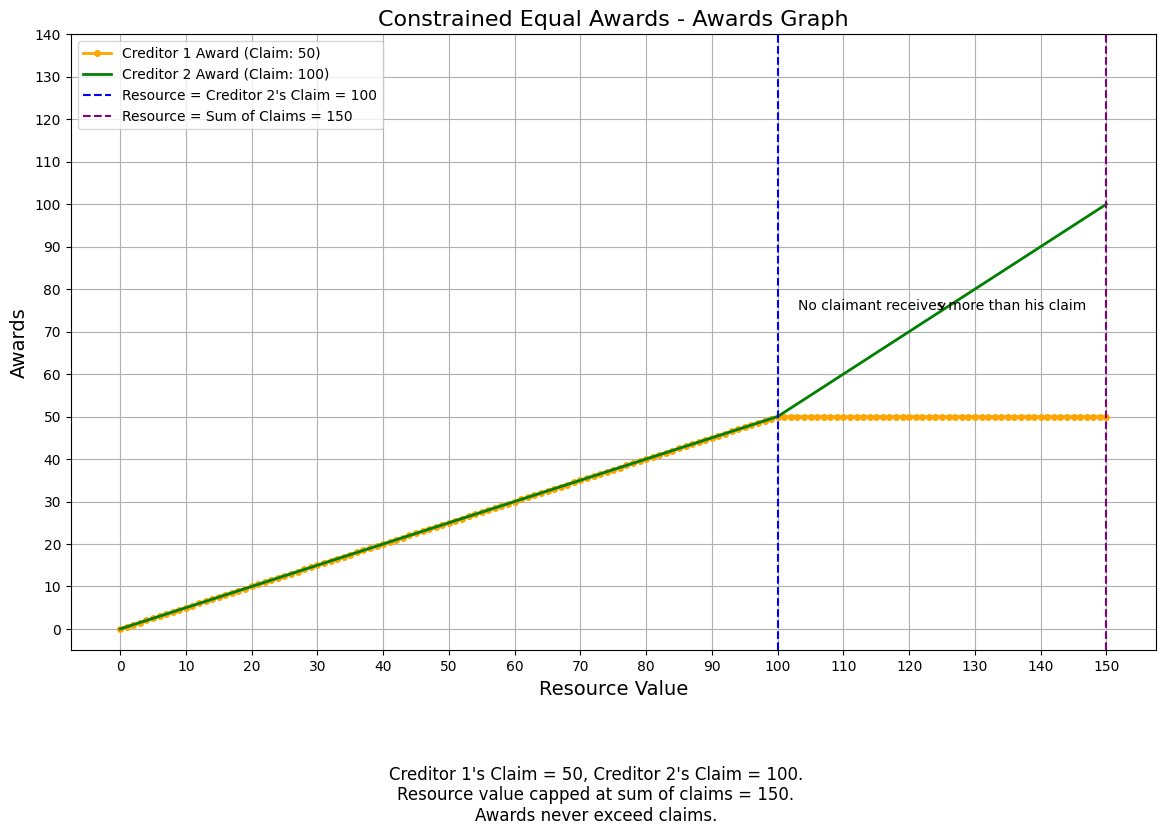

In [258]:
import matplotlib.pyplot as plt


def visualize_constrained_equal_awards_with_two(claim_1, claim_2):
    max_asset = claim_1 + claim_2

    asset_values = [e for e in range(0, max_asset + 1)]

    allocations_1 = []
    allocations_2 = []
    
    for asset in asset_values:
        allocation_to_one, allocation_to_two = constrained_equal_awards(asset, [claim_1, claim_2])
        allocations_1.append(allocation_to_one)
        allocations_2.append(allocation_to_two)

    # Plot the results
    plt.figure(figsize=(14, 8))

    # Plot allocations
    plt.plot(asset_values, allocations_1, label=f"Creditor 1 Award (Claim: {claim_1})", linewidth=2, color='orange', marker='o', markersize=4)
    plt.plot(asset_values, allocations_2, label=f"Creditor 2 Award (Claim: {claim_2})", linewidth=2, color='green')

    # Add vertical lines for key checkpoints
    plt.axvline(claim_2, color="blue", linestyle="--", label=f"Resource = Creditor 2's Claim = {claim_2}")
    plt.axvline(max_asset, color="purple", linestyle="--", label=f"Resource = Sum of Claims = {max_asset}")

    # Balanced arrows and annotations
    arrow_length = 15  # Fixed arrow length for consistency

    plt.annotate(
        "No claimant receives more than his claim", 
        xy=(claim_2 + (max_asset - claim_2) / 2, allocations_2[int(claim_2 + (max_asset - claim_2) / 2)]),
        xytext=(claim_2 + (max_asset - claim_2) / 2, allocations_2[int(claim_2)] + arrow_length + 10),
        arrowprops=dict(facecolor='black', arrowstyle="->", shrinkA=5, shrinkB=5),
        fontsize=10, color="black", ha="center"
    )

    plt.xticks(range(0, max_asset + 10, 10))  # X-axis ticks every 10
    plt.yticks(range(0, claim_2 + 50, 10))    # Y-axis ticks every 10

    # Labels and legend
    plt.title("Constrained Equal Awards - Awards Graph", fontsize=16)
    plt.xlabel("Resource Value", fontsize=14)
    plt.ylabel("Awards", fontsize=14)
    plt.legend(loc="upper left")
    plt.grid(True)

    # Add text at the bottom to clarify constant claims
    plt.figtext(0.5, -0.1, "Creditor 1's Claim = 50, Creditor 2's Claim = 100.\nResource value capped at sum of claims = 150.\nAwards never exceed claims.",
                wrap=True, horizontalalignment='center', fontsize=12, color="black")

    plt.show()

# Visualize with vertical line at sum of claims
visualize_constrained_equal_awards_with_two(claim_1=50, claim_2=100)

In his glosses to Rif Ketuboth 51a, Ravad writes:

> Rather, their division is truly as follows: Up to the point where their claims (liens) are completely equal, they all divide equally. From the point where one claim is exhausted, and only the other two still have claims, the two remaining claimants divide equally. The one whose claim is fully exhausted no longer takes anything. Finally, from the point where the second claim is exhausted, the third claimant takes the remainder alone.

Ravad's rule is specified only for problems in which the estate is less than or equal to the largest claim $d_n$.

Fix the claims and let the value of the estate grow from 0 to the sum of the claims.

When $E is less than or equal to the smallest claim, all claimants receive equal awards.

As $E$ increases from the smallest to the second smallest claim, the smallest claimant continues to receive $/frac{1/n}$ of their claim; each of the others receives that amount plus an equal share of the difference between $E$ and the smallest claim. In general, when $E$ increases from the $kth$ smallest claim to the $(k +1)th$ smallest claim, the $k$ smallest claimants continue to receive the amounts they receive when $E$ reaches the kth smallest claim, and each of the others receives the amount they receive then plus an equal share of the difference between $E$ and the kth smallest claim.

This rule seems natural since:

When $E \leq d_1$, all creditors have a claim on the first $d_1$ dollars.

Only creditors $2, \dots, n$ have a claim on the next $d_2 - d_1$ dollars, and so on.

This rule can be computed as follows:

In [259]:
def rabad_rule(estate, claims):
    """
    Compute the allocation of the estate among creditors following Rabad's rule.

    Parameters:
    - estate (float): Total estate to be divided.
    - claims (list of floats): List of claims by creditors.

    Returns:
    - list of floats: The allocation for each creditor following Rabad's method.
    """
    # Sort claims in ascending order while keeping track of original indices
    indexed_claims = sorted(enumerate(claims), key=lambda x: x[1])
    sorted_claims = [claim for _, claim in indexed_claims]
    n = len(sorted_claims)
    
    # Initialize allocations to zero
    allocations = [0] * n
    remaining_creditors = n
    previous_threshold = 0

    for i in range(n):
        current_threshold = sorted_claims[i]
        if estate <= previous_threshold:
            break

        available_amount = min(estate - previous_threshold, current_threshold - previous_threshold)
        per_creditor_share = available_amount / remaining_creditors

        for j in range(i, n):
            allocations[j] += per_creditor_share
        
        previous_threshold = current_threshold
        remaining_creditors -= 1

    # Reorder allocations to match the original input order
    final_allocations = [0] * n
    for (original_index, _), allocation in zip(indexed_claims, allocations):
        final_allocations[original_index] = allocation

    return final_allocations

test_cases = [
    (50, [100, 200, 300]),
    (100, [100, 200, 300]),
    (150, [100, 200, 300]),
    (200, [100, 200, 300]),
    (250, [100, 200, 300]),
    (300, [100, 200, 300]),
]

results = get_results_from_test_cases(test_cases, rabad_rule)
print_markdown_table(results)



| Resource | Claim 1 | Claim 2 | Claim 3 | Award 1            | Award 2            | Award 3            |
|----------|---------|---------|---------|--------------------|--------------------|--------------------|
| 50       | 100     | 200     | 300     | 16.666666666666668 | 16.666666666666668 | 16.666666666666668 |
| 100      | 100     | 200     | 300     | 33.333333333333336 | 33.333333333333336 | 33.333333333333336 |
| 150      | 100     | 200     | 300     | 33.333333333333336 | 58.333333333333336 | 58.333333333333336 |
| 200      | 100     | 200     | 300     | 33.333333333333336 | 83.33333333333334  | 83.33333333333334  |
| 250      | 100     | 200     | 300     | 33.333333333333336 | 83.33333333333334  | 133.33333333333334 |
| 300      | 100     | 200     | 300     | 33.333333333333336 | 83.33333333333334  | 183.33333333333334 |


The fact that the concede and divide rules stiches together three different rules implies that we can implement the rule by explicitly invoking different allocation rules for the three different regimes and obtain the same result:

In [260]:
def concede_and_divide_with_two_refactored(asset, claims):
    claim_1 = claims[0]
    claim_2 = claims[1]

    # first regime
    if asset <= min(claims):
        return constrained_equal_awards(asset, claims)

    # second regime
    elif min(claims) < asset <= claim_2:
        concession_of_one_to_two = max(asset - claim_1, 0)
        concession_of_two_to_one = max(asset - claim_2, 0)
        contested_portion = asset - concession_of_one_to_two - concession_of_two_to_one
        half_contested = contested_portion / 2
        allocation_to_one = half_contested + concession_of_two_to_one
        allocation_to_two = half_contested + concession_of_one_to_two
        return round(allocation_to_one, 2), round(allocation_to_two, 2)

    # third regime - claim 2 < asset < sum of claims
    else:
        return constrained_equal_losses(asset, claims)


test_cases = [
    (100, [100, 100]),
    (100, [50, 100]),
    (100, [100, 33.3]),
]

results = get_results_from_test_cases(test_cases, concede_and_divide_with_two_refactored)
print_markdown_table(results)

| Resource | Claim 1 | Claim 2 | Award 1 | Award 2 |
|----------|---------|---------|---------|---------|
| 100      | 100     | 100     | 50.0    | 50.0    |
| 100      | 50      | 100     | 25.0    | 75.0    |
| 100      | 100     | 33.3    | 83.35   | 16.65   |


### Ravad's Bidding Rule

In his glosses to Maimonidies' *Laws of Lending and Borrowing, Chapter 20, Section 4*, Ravad writes:

> Even though (it was said) that "they divide it equally between them", according to the Talmud, this interpretation does not seem correct. For we challenged Rav Chisda with the case: "If the one who pledged forty withdraws, he is liable to pay up to ten." Why not simply say that the one who pledged fifty should join him in paying? And if we follow the interpretation that they are equalized regardless of the sizes of their bids, why then do we challenge by asking, "Why doesn't the one who pledged fifty pay alongside him?" After all, they would be equal, both paying ten.

> Rather, the explanation is that "they divide it in thirds", meaning they equalize the larger pledge to match the smaller one. The one who pledged the larger amount (and withdrew) gives a share equal to half the return of the one who pledged the smaller amount. The reasoning is that when he pledged fifty, the forty is already included within it. Thus, both are effectively withdrawing from ten, which is the excess over the thirty. Therefore, the one who pledged fifty and the one who pledged forty complete the remaining ten. Similarly, in any case where there is a reduction, the one who pledged the larger amount completes the difference to match the smaller one, but the smaller pledge does not increase to match the larger one.

Ravad's rule divides the loss into the $n$ successive increments $b_1, b_2, - b_1, b_3 - b_2,..., b_n - b_{n-1}$. The first increment is paid by all bidders in equal shares, the second in equal shares by all except 1, and s on.

This rule can be computed as follows:

In [261]:
def rabad_loss_allocation(total_loss, bids):
    """
    Compute the allocation of losses among bidders based on Rabad's method.

    Args:
        bids (list of int): A list of bids in ascending order.
        total_loss (int): The total loss to be allocated.

    Returns:
        list of float: A list representing the loss allocated to each bidder.
    """
    n = len(bids)
    increments = [bids[0]] + [bids[i] - bids[i - 1] for i in range(1, n)]
    losses = [0] * n

    for i, increment in enumerate(increments):
        share = min(total_loss, increment) / (n - i)
        for j in range(i, n):
            losses[j] += share
        total_loss -= min(total_loss, increment)
        if total_loss <= 0:
            break

    return [round(loss, 2) for loss in losses]

test_cases = [
    (21,  [10, 20, 24]),
    (15, [10, 30, 50]),
    (20, [5, 15, 25, 40]),
]

results = get_results_from_test_cases(test_cases, rabad_loss_allocation)
print_markdown_table(results, bids=True)


| Total Loss | Bid 1 | Bid 2 | Bid 3 | Bid 4 | Loss 1 | Loss 2 | Loss 3 | Loss 4 |
|------------|-------|-------|-------|-------|--------|--------|--------|--------|
| 21         | 10    | 20    | 24    |       | 3.33   | 8.33   | 9.33   |        |
| 15         | 10    | 30    | 50    |       | 3.33   | 5.83   | 5.83   |        |
| 20         | 5     | 15    | 25    | 40    | 1.25   | 4.58   | 7.08   | 7.08   |


## Duality

Solving a claims problem can be understood as dividing what is available or
dividing what is missing, the shortfall. The two viewpoints seem to be equally
worthy of study.

Two *problems* are *dual* if they have the same claims vector and the resource of one is equal to the difference between the sum of the claims and the resource in the other.

A *rule* is *self-dual* if in each problem it divides what is available in the same way as it divides the deficit in the dual problem:

Formally, a rule is self-dual if the following holds: 

For each $(c, E) \in \mathcal{C}^N$, we have 

$$
S(c, E) = c - S\left(c, \sum c_i - E\right).
$$

We can obtain the dual of a rule in Python as follows:


In [262]:
import numpy as np

def get_dual(rule):
    """
    Returns the dual of a given division rule.
    
    Parameters:
        rule (function): A function that takes (c, E) as input, where:
                      - c is a list of claims
                      - E is the available estate
                      - The function returns an allocation for each claimant.
    
    Returns:
        function: A function computing the dual rule.
    """
    def dual_rule(E, c):
        total_claims = sum(c)
        deficit = total_claims - E
        original_allocation = rule(deficit, c)
        return [round(ci - ai, 2) for ci, ai in zip(c, original_allocation)]
    
    return dual_rule


For example, the proportional and concede and divide rules are self-dual:

In [263]:
test_cases = [
    (100, [100, 100]),
    (100, [50, 100]),
    (100, [100, 33.3]),
]

results = get_results_from_test_cases(test_cases, proportional_rule)
print('proportional rule:')
print_markdown_table(results)
print()

dual_proportional_rule = get_dual(proportional_rule)

results = get_results_from_test_cases(test_cases, dual_proportional_rule)
print('dual of proportional rule:')
print_markdown_table(results)

proportional rule:
| Resource | Claim 1 | Claim 2 | Award 1 | Award 2 |
|----------|---------|---------|---------|---------|
| 100      | 100     | 100     | 50.0    | 50.0    |
| 100      | 50      | 100     | 33.33   | 66.67   |
| 100      | 100     | 33.3    | 75.02   | 24.98   |

dual of proportional rule:
| Resource | Claim 1 | Claim 2 | Award 1 | Award 2 |
|----------|---------|---------|---------|---------|
| 100      | 100     | 100     | 50.0    | 50.0    |
| 100      | 50      | 100     | 33.33   | 66.67   |
| 100      | 100     | 33.3    | 75.02   | 24.98   |


In [264]:
test_cases = [
    (100, [100, 100]),
    (100, [50, 100]),
    (100, [100, 33.3]),
]

results = get_results_from_test_cases(test_cases, concede_and_divide_with_two)
print('concede and divide rule:')
print_markdown_table(results)
print()

dual_concede_and_divide = get_dual(concede_and_divide_with_two)

results = get_results_from_test_cases(test_cases, dual_concede_and_divide)
print('dual of concede and divide rule:')
print_markdown_table(results)

concede and divide rule:
| Resource | Claim 1 | Claim 2 | Award 1 | Award 2 |
|----------|---------|---------|---------|---------|
| 100      | 100     | 100     | 50.0    | 50.0    |
| 100      | 50      | 100     | 25.0    | 75.0    |
| 100      | 100     | 33.3    | 83.35   | 16.65   |

dual of concede and divide rule:
| Resource | Claim 1 | Claim 2 | Award 1 | Award 2 |
|----------|---------|---------|---------|---------|
| 100      | 100     | 100     | 50.0    | 50.0    |
| 100      | 50      | 100     | 25.0    | 75.0    |
| 100      | 100     | 33.3    | 83.35   | 16.65   |


We raised the question earlier: why does Rashi introduce the concede and divide rule if the constrained equal losses rule fits the Mishnah just as well? If Rashi bases himself on something the Talmud said, this just shifts the question: why did the Talmud interpret the Mishanh as applying the concede and divide rule rather than constrained equal losses?

### Run on the Bank

The problem goes deeper since there is a third candidate algorithm which fits the Mishna's ruling that is based on the idea of a run-on-the-bank (see Peyton Young, *Equity*). Here, we imagine two claimants rushing to a court to claim a share of a contested asset.

In this scenario, the first claimant to arrive receives as much of their claim as the asset can cover. The second claimant receives whatever remains (if anything).

Of course, this process gives an unfair advantage to the claimant who arrives first, as the first in line gets priority and can secure more of the estate, regardless of fairness or proportionality.

However, we can add fairness back through randomization, such as flipping a coin:
If the coin determines the order in which claims are resolved, each claimant has an equal chance of going first.
This randomization ensures that neither party has an inherent advantage based on timing.

Instead of physically flipping a coin, the *expected payments* for each claimant can be calculated *as if* the coin were flipped repeatedly for many trials.

This expected payment represents the *average amount* each claimant would receive if they alternated positions at the front of the line.

The result of this calculation is fair arbitration of the run-on-the-bank procedure, as it eliminates bias due to position:

In [265]:
def compute_allocation_when_first(estate, claims):
    claim_first, claim_second = claims[0], claims[1]
    allocation_first = min(claim_first, estate)
    allocation_second = min(claim_second, max(0, estate - allocation_first))
    return allocation_first, allocation_second

def run_on_the_bank_with_two(estate, claims):
    claim_1, claim_2 = claims[0], claims[1]
    allocation_1_first, allocation_2_first = compute_allocation_when_first(estate, [claim_1, claim_2])    
    allocation_2_second, allocation_1_second = compute_allocation_when_first(estate, [claim_2, claim_1])
    
    allocation_1 = (allocation_1_first + allocation_1_second) / 2
    allocation_2 = (allocation_2_first + allocation_2_second) / 2
    
    return round(allocation_1, 2), round(allocation_2, 2)

test_cases = [
    (100, [100, 100]),
    (100, [50, 100]),
    (100, [100, 33.3]),
]

results = get_results_from_test_cases(test_cases, run_on_the_bank_with_two)
print_markdown_table(results)

| Resource | Claim 1 | Claim 2 | Award 1 | Award 2 |
|----------|---------|---------|---------|---------|
| 100      | 100     | 100     | 50.0    | 50.0    |
| 100      | 50      | 100     | 25.0    | 75.0    |
| 100      | 100     | 33.3    | 83.35   | 16.65   |


Furthermore, the payoff profile for the run on the bank algorithm looks the same as Rashi's concede and divide algorithm:

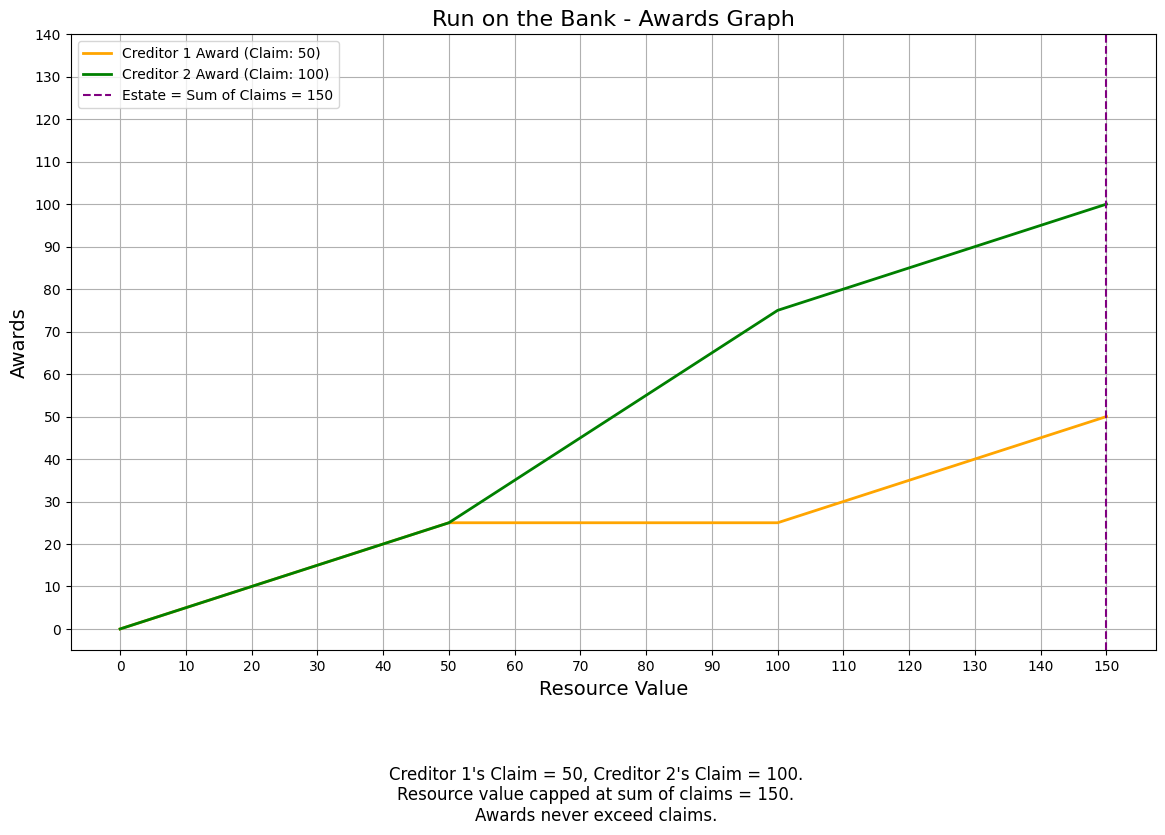

In [266]:
def visualize_run_on_the_bank_with_two(claim_1, claim_2):
    max_asset = claim_1 + claim_2
    # Generate estate values
    asset_values = [e for e in range(0, max_asset + 1)]
    
    # Calculate allocations for each estate value
    allocations_1 = []
    allocations_2 = []
    
    for asset in asset_values:
        allocation_to_one, allocation_to_two = run_on_the_bank_with_two(asset, [claim_1, claim_2])
        allocations_1.append(allocation_to_one)
        allocations_2.append(allocation_to_two)
    
    # Plot the results
    plt.figure(figsize=(14, 8))
    
    # Plot allocations
    plt.plot(asset_values, allocations_1, label=f"Creditor 1 Award (Claim: {claim_1})", linewidth=2, color='orange')
    plt.plot(asset_values, allocations_2, label=f"Creditor 2 Award (Claim: {claim_2})", linewidth=2, color='green')
    
    # Add vertical lines for key checkpoints
    plt.axvline(max_asset, color="purple", linestyle="--", label=f"Estate = Sum of Claims = {max_asset}")
    
    
    # Balanced arrows and annotations
    arrow_length = 15  # Fixed arrow length for consistency
    
    # Labels and legend
    plt.title("Run on the Bank - Awards Graph", fontsize=16)
    plt.xlabel("Resource Value", fontsize=14)
    plt.ylabel("Awards", fontsize=14)
    plt.legend(loc="upper left")
    plt.grid(True)
    
    plt.xticks(range(0, max_asset + 10, 10))  # X-axis ticks every 10
    plt.yticks(range(0, claim_2 + 50, 10))    # Y-axis ticks every 10
    
    # Add text at the bottom to clarify constant claims
    plt.figtext(0.5, -0.1, "Creditor 1's Claim = 50, Creditor 2's Claim = 100.\nResource value capped at sum of claims = 150.\nAwards never exceed claims.",
                wrap=True, horizontalalignment='center', fontsize=12, color="black")
    
    plt.show()

visualize_run_on_the_bank_with_two(claim_1=50, claim_2=100)

The first Mishnah of Bava Metziah considers two claimants. However, what should be the rule in a case with more than two claimants? In other words, how should the Mishnah's ruling be generalized from cases of two claimants to cases of *n* claimants? 

Perhaps Rashi interprets the Mishanh using the conceded and divide rule beecause it generalizes better to *n* claimants than the constrained equal losses and run on the bank rules.

Mishnah Ketuboth 10:4 (cited in B.T. Ketuboth 93a) reads as follows:  

If a man who was married to three wives dies and the kethubah [marriage contract] of one was a maneh [100 zuz], of the other two hundred zuz, and of the third three hundred zuz and the estate [was worth] only one maneh the sum is divided equally. If the estate [was worth] two hundred zuz [the claimant] of the maneh receives fifty zuz [and the claimants respectively] of the two hundred and the three hundred zuz [receive each] three gold denarii [seventy-five zuz]. If the estate [was worth] three hundred zuz, [the claimant] of the maneh receives fifty zuz and [the claimant] of the two hundred zuz [receives] a maneh while [the claimant] of the three hundred zuz [receives] six gold denarii. Similarly, if three persons contributed to a joint fund and they made a loss or a profit they share in the same manner.  


We can summarize the Mishnah's rulings in the following table:

| Resource Value | Claim 1 | Claim 2 | Claim 3 | Award to Claim 1 | Award to Claim 2 | Award to Claim 3 |
|----------------|--------|--------|-------|------------------|------------------|----------------------|
| 100            | 100    | 200    | 300   | 33.33            | 33.33            | 33.33                |
| 200            | 100    | 200    | 300   | 50               | 75               | 75                   |
| 300            | 100    | 200    | 300   | 50               | 100              | 150                  |

At first, glance, these numbers are difficult to explain. In the first case, the Mishnah seems to advocate equal division. The logic behind the second case is opaque. The third ruling seems to be the rule of proportionality. What logic binds these rulings together? Is Mishnah Ketuboth intended to be a generalization of Mishnah Bava Metziah to a case of three claimants or should we view the two as unrelated since in Mishnah Bava Metziah one of the claimants is certainly mistaken wehereas in Mishnah Ketuboth all of the claimants are correct in their claims?

In [267]:
def print_payoff_summary(asset, claims, division_function):
    """
    Prints a summary of the asset, claims, and payoffs in tuple-like format.

    Parameters:
    - asset: Total asset value to be divided.
    - claims: A list of claims from claimants.
    - division_function: The function used to compute the division of the asset.
    """
    # Compute the payoff using the given division function
    payoff = division_function(asset, claims)

    # Print the results in a clear and concise format
    print(f"Asset: {asset}")
    print(f"Claims: {tuple(claims)}")
    print(f"Payoffs: {tuple(payoff)}")
    print("-" * 30)

test_cases = [
    (100, [100, 200, 300]),
    (200, [100, 200, 300]),
    (300, [100, 200, 300]),
]

results = get_results_from_test_cases(test_cases, proportional_rule)
print('proportional rule:')
print_markdown_table(results)
print()

dual_concede_and_divide = get_dual(concede_and_divide_with_two)

results = get_results_from_test_cases(test_cases, constrained_equal_awards)
print('constrained equal awards:')
print_markdown_table(results)

proportional rule:
| Resource | Claim 1 | Claim 2 | Claim 3 | Award 1 | Award 2 | Award 3 |
|----------|---------|---------|---------|---------|---------|---------|
| 100      | 100     | 200     | 300     | 16.67   | 33.33   | 50.0    |
| 200      | 100     | 200     | 300     | 33.33   | 66.67   | 100.0   |
| 300      | 100     | 200     | 300     | 50.0    | 100.0   | 150.0   |

constrained equal awards:
| Resource | Claim 1 | Claim 2 | Claim 3 | Award 1 | Award 2 | Award 3 |
|----------|---------|---------|---------|---------|---------|---------|
| 100      | 100     | 200     | 300     | 33.33   | 33.33   | 33.33   |
| 200      | 100     | 200     | 300     | 66.67   | 66.67   | 66.67   |
| 300      | 100     | 200     | 300     | 100.0   | 100.0   | 100.0   |


In his 1863 book *Darkah Shel Torah* p. 64, Zvi Menahem Piniles presented the following rule to explain the cases in Ketubot.

### Definition (Piniles' Rule)

For each $(c, E) \in C^N$ and each $i \in N$:

$$
Pin_i(c, E) \equiv
\begin{cases} 
\min\left(\frac{c_i}{2}, \lambda\right), & \text{if } E \leq \sum_{j=1}^n \frac{c_j}{2}, \\
\frac{c_i}{2} + \min\left(\frac{c_i}{2}, \lambda\right), & \text{otherwise},
\end{cases}
$$

where in each case, $\lambda \in \mathbb{R}_+$ is chosen so as to achieve *balance*.

In other words, if the value of the resource is less than or equal to the sum of the half-claims, then the constrained equal awards rule is applied to the list of half-claims.  

If the value of the resource is strictly greater than the sum of the half-claims, then each claimant is granted his half-claim and the remainder is distributed using constrained equal awards.

Becuase Piniles' rule is based on constrained equal awards as applied to the half-claims instead of the full claims, we can solve for lambda in the same way we did for constrained equal awards.

In [268]:
def compute_lambda(estate, claims):
    """
    Compute the value of lambda for the Constrained Equal Awards (CEA) Rule
    on the given list of claims using the closed-form expression.

    Parameters:
    - estate (float): Total estate to be divided.
    - claims (list of floats): List of claims.

    Returns:
    - float: The computed value of lambda.
    """
    sorted_claims = sorted(claims)
    n = len(sorted_claims)
    sum_of_satisfied_claims = 0

    for k in range(n):
        lambda_value = (estate - sum_of_satisfied_claims) / (n - k)

        # Check if lambda is valid for the next claim
        if k == n - 1 or lambda_value <= sorted_claims[k]:
            return lambda_value

        sum_of_satisfied_claims += sorted_claims[k]

    return 0


def piniles_rule_using_lambda(estate, claims):
    """
    Compute the awards vector for Piniles' Rule by explicitly calculating lambda.

    Parameters:
    - estate (float): Total estate to be divided.
    - claims (list of floats): List of claims.

    Returns:
    - list of floats: Awards vector according to Piniles' Rule.
    """
    # Step 1: Compute half-claims
    half_claims = [claim / 2 for claim in claims]
    half_sum_of_claims = sum(half_claims)

    if estate <= half_sum_of_claims:
        # Case 1: Apply CEA Rule directly to half-claims
        lambda_value = compute_lambda(estate, half_claims)
        return [round(min(hc, lambda_value), 2) for hc in half_claims]
    else:
        # Case 2: First assign half-claims, then apply CEA to the remaining estate
        remaining_estate = estate - half_sum_of_claims
        lambda_value = compute_lambda(remaining_estate, half_claims)
        awards_from_remaining = [min(hc, lambda_value) for hc in half_claims]
        return [round(hc + ar, 2) for hc, ar in zip(half_claims, awards_from_remaining)]


test_cases = [
    (100, [100, 200, 300]),
    (200, [100, 200, 300]),
    (300, [100, 200, 300]),
]

results = get_results_from_test_cases(test_cases, piniles_rule_using_lambda)
print_markdown_table(results)


| Resource | Claim 1 | Claim 2 | Claim 3 | Award 1 | Award 2 | Award 3 |
|----------|---------|---------|---------|---------|---------|---------|
| 100      | 100     | 200     | 300     | 33.33   | 33.33   | 33.33   |
| 200      | 100     | 200     | 300     | 50.0    | 75.0    | 75.0    |
| 300      | 100     | 200     | 300     | 50.0    | 100.0   | 150.0   |


We can compute piniles_rule directly without explicitly solving for lambda as follows:

In [269]:
def piniles_rule(E, claims):
    """
    Compute Piniles' rule for dividing an endowment among claimants.

    Args:
        E (float): The endowment to be divided.
        claims (list of float): The claims of the claimants.

    Returns:
        list of float: The allocation for each claimant based on Piniles' rule.
    """
    half_claims = [c / 2 for c in claims]
    sum_of_half_claims = sum(half_claims)

    if E <= sum_of_half_claims:
        return constrained_equal_awards(E, half_claims)
    else:
        remainder = E - sum_of_half_claims
        cea_remainder = constrained_equal_awards(remainder, half_claims)
        return [half_claim + constrained_equal_award for half_claim, constrained_equal_award in zip(half_claims, cea_remainder)]

test_cases = [
    (100, [100, 200, 300]),
    (200, [100, 200, 300]),
    (300, [100, 200, 300]),
]

results = get_results_from_test_cases(test_cases, piniles_rule)
print_markdown_table(results)

| Resource | Claim 1 | Claim 2 | Claim 3 | Award 1 | Award 2 | Award 3 |
|----------|---------|---------|---------|---------|---------|---------|
| 100      | 100     | 200     | 300     | 33.33   | 33.33   | 33.33   |
| 200      | 100     | 200     | 300     | 50.0    | 75.0    | 75.0    |
| 300      | 100     | 200     | 300     | 50.0    | 100.0   | 150.0   |


Note that Piniles' Rule does not produce the numbers from the second case in Mishnah Bava Metziah:

In [270]:
test_cases = [
    (100, [50, 100])
]

results = get_results_from_test_cases(test_cases, piniles_rule)
print_markdown_table(results)

| Resource | Claim 1 | Claim 2 | Award 1 | Award 2 |
|----------|---------|---------|---------|---------|
| 100      | 50      | 100     | 37.5    | 62.5    |


The Shapley value generalizes the run on the bank algorithm by considering all possible orderings of the claimants:
It calculates the allocation for each claimant by averaging their payoffs across all possible orderings of the claimants.
For any specific ordering, the first claimant takes their full claim (or as much of it as the estate allows), the second claimant takes their claim from what remains, and so on, until the estate is exhausted:

In [271]:
from itertools import permutations


def shapley_value(estate, claims):
    num_claimants = len(claims)
    shapley_values = [0] * num_claimants  # Initialize Shapley values to 0
    
    # Generate all permutations of claimants
    for perm in permutations(range(num_claimants)):
        remaining_estate = estate
        allocation = [0] * num_claimants  # Initialize allocations for this permutation
        
        # Process each claimant in the permutation order
        for claimant in perm:
            # Allocate as much as possible up to the claimant's claim
            allocation[claimant] = min(remaining_estate, claims[claimant])
            remaining_estate -= allocation[claimant]  # Reduce the remaining estate
            
            if remaining_estate <= 0:  # Stop if the estate is exhausted
                break
        
        # Add the allocation for this permutation to the Shapley values and average over all permutations
        for i in range(num_claimants):
            shapley_values[i] += allocation[i] / len(list(permutations(range(num_claimants))))

    return [round(value, 2) for value in shapley_values]

test_cases = [
    (100, [100, 200, 300]),
    (200, [100, 200, 300]),
    (300, [100, 200, 300]),
]

results = get_results_from_test_cases(test_cases, shapley_value)
print_markdown_table(results)

| Resource | Claim 1 | Claim 2 | Claim 3 | Award 1 | Award 2 | Award 3 |
|----------|---------|---------|---------|---------|---------|---------|
| 100      | 100     | 200     | 300     | 33.33   | 33.33   | 33.33   |
| 200      | 100     | 200     | 300     | 33.33   | 83.33   | 83.33   |
| 300      | 100     | 200     | 300     | 50.0    | 100.0   | 150.0   |


The Shapley value also disagrees with the ruling of Mishnah Ketuboth. It turns out that the Shapley value has a serious flaw when duplicating problems with identical claimants. For example:

Original Problem: Two claimants, A and B, with claims of 200 and 300, against an estate of 300.
The Shapley Value gives: A = 100, B = 200.
Duplicated Problem: Two copies of each claimant, for a total of four claimants (A, A, B, B), with an estate of 600.
Intuitively, we might expect:
Each copy of A receives 50, totaling 100 for A.
Each copy of B receives 100, totaling 200 for B.

However, the Shapley Value assigns:
A = 116 2/3
B = 183 1/3

The inconsistency arises because the Shapley Value depends on orderings of all claimants and how the estate is allocated in those orderings. When claimants are duplicated, the additional orderings created by the duplicates influence the average allocations, leading to unexpected results. This violates our expectation that duplicating claimants should yield the same total allocation as the original problem.

In [272]:
print_payoff_summary(300, [200, 300], shapley_value)
print_payoff_summary(600, [200, 200, 300, 300], shapley_value)

test_cases = [
    (300, [200, 300]),
    (600, [200, 200, 300, 300]),
]

results = get_results_from_test_cases(test_cases, shapley_value)
print_markdown_table(results)

Asset: 300
Claims: (200, 300)
Payoffs: (100.0, 200.0)
------------------------------
Asset: 600
Claims: (200, 200, 300, 300)
Payoffs: (116.67, 116.67, 183.33, 183.33)
------------------------------
| Resource | Claim 1 | Claim 2 | Claim 3 | Claim 4 | Award 1 | Award 2 | Award 3 | Award 4 |
|----------|---------|---------|---------|---------|---------|---------|---------|---------|
| 300      | 200     | 300     |         |         | 100.0   | 200.0   |         |         |
| 600      | 200     | 200     | 300     | 300     | 116.67  | 116.67  | 183.33  | 183.33  |


Intuitively, we expect that the allocations for the second case should be:

[50, 50, 100, 100]

The inconsistency arises because the Shapley Value depends on orderings of all claimants and how the estate is allocated in those orderings. When claimants are duplicated, the additional orderings created by the duplicates influence the average allocations, leading to unexpected results. This violates our expectation that duplicating claimants should yield the same total allocation as the original problem.

We know that constrained equal losses accounts for all of the numbers in Mishnah Bava Metziah 1:1. We also know from Piniles' rule that constrained equal awards accounts for all of the numbers in Mishnah Ketuboth. This suggests we should be able to find one meta-rule that accounts for the numbers in both places which leverages constrained equal losses and constrained equal awards depending on the case. In their ground breaking 1985 paper "Game Theoretic Analysis of a Bankruptcy Problem From the Talmud," Aumann and Maschler borrow Piniles' idea of a decision point at the sum of the half claims, but they take this idea in a direction that is consistent with the numbers in Mishnah Bava Metziah 1:1. 

The argue that the sum of the half-claims is significant in light of the Talmudic principle that "more than half is equivalent to the whole." Psychologically, expectations are low when the sum of the half-claims is less than the value of the resource. Therefore, we take the perpsective of splitting gains. Conversely when the sum of the half claims is greater than the value of the resource, expectations are high and we take the perspective of splitting losses.

They offered three different ways of computing a solution which is consistent with the numbers from Mishnah Ketuboth and Mishnah Bava Metziah.

### Talmud Rule

For each $(c, E) \in C^N$ and each $i \in N$,

$$
T_i(c, E) \equiv
\begin{cases}
\min \left\{ \frac{c_i}{2}, \lambda \right\} & \text{if } E \leq \sum \frac{c_j}{2}, \\
c_i - \min \left\{ \frac{c_i}{2}, \lambda \right\} & \text{otherwise},
\end{cases}
$$

where in each case, $\lambda \in \mathbb{R}_+$ is chosen so as to achieve *balance*.

### Solving for Lambda in the Talmud Rule

We solve for $\lambda$ in both cases by using a single water–filling equation:
$$
\sum_{i=1}^n \min\Bigl\{\frac{c_i}{2},\,\lambda\Bigr\} = \text{target},
$$
where the target is:
- $E$ for a small estate, and
- $T - E$ for a large estate (with $T = \sum_{i=1}^n c_i$).

The water–filling procedure to determine $\lambda$ is as follows:

1. Compute and sort the half–claims:
   For each claimant, compute $\frac{c_i}{2}$ and sort these values in ascending order:
   $$
   \frac{c_{1}}{2} \le \frac{c_{2}}{2} \le \cdots \le \frac{c_{n}}{2}.
   $$

2. **Set the target:**  
   Let
   - $\text{amount} = E$ in the small–estate case, or
   - $\text{amount} = T - E$ in the large–estate case.

3. **Apply the water–filling algorithm:**
   - Initialize a cumulative sum $C = 0$.
   - For $k = 0, 1, \dots, n-1$, compute
     $$
     \lambda = \frac{\text{amount} - C}{n - k}.
     $$
   - If $k = n - 1$ or $\lambda \le \frac{c_{k+1}}{2}$, then stop and take this $\lambda$ as the solution.
   - Otherwise, add $\frac{c_{k+1}}{2}$ to $C$ and continue.

This logic is implemented in the Python function below:


In [273]:
def compute_lambda_talmud(amount, claims):
    """
    Compute lambda for a water-filling allocation on half–claims.
    
    Given an amount (either the estate in the low–estate case or the total losses
    in the high–estate case) and the list of claims (which determine half–claims),
    this function finds lambda such that when distributing the amount among the
    claimants with maximums c_i/2 the following holds:
    
        sum_{i=1}^n min(c_i/2, lambda) = amount.
    
    Parameters:
        amount (float): The resource to distribute (should be <= sum(c_i/2)).
        claims (list of float): The list of claims.
        
    Returns:
        float: The computed lambda.
    """
    n = len(claims)
    half_claims = [claim / 2 for claim in claims]
    sorted_half = sorted(half_claims)
        
    cumulative = 0.0
    for k in range(n):
        lambda_value = (amount - cumulative) / (n - k)
        # If we have reached the last claimant or the computed lambda does not exceed
        # the current half–claim in sorted order, return it.
        if k == n - 1 or lambda_value <= sorted_half[k]:
            return lambda_value
        cumulative += sorted_half[k]
    
    # Fallback; in a correctly posed problem this line should never be reached.
    return 0.0

def talmud_rule_using_lambda(estate, claims):
    """
    Allocate an estate among creditors following the Talmud rule.
    
    The rule is implemented by splitting the problem into two cases.
    
    (1) Low–estate case: When the estate is at most the sum of half–claims,
        we “build up” awards starting at 0. In this case one finds lambda so that
            sum_i min(c_i/2, lambda) = estate,
        and awards are given by
            x_i = min(c_i/2, lambda).
            
    (2) High–estate case: When the estate exceeds the sum of half–claims,
        we work with the losses from full claims. If total claims sum to T, then the
        total loss is T – estate and we choose lambda so that
            sum_i min(c_i/2, lambda) = T – estate.
        The award to each claimant is then
            x_i = c_i – min(c_i/2, lambda).
    
    Parameters:
        estate (float): Total estate to be divided.
        claims (list of float): List of claims by creditors.
    
    Returns:
        list of float: The allocation for each creditor following the Talmud rule.
    """
    half_claims = [claim / 2 for claim in claims]
    total_half = sum(half_claims)
    total_claims = sum(claims)
    
    # Low–estate case
    if estate <= total_half:
        lambda_value = compute_lambda_talmud(estate, claims)
        # Each award is capped by c/2
        return [round(min(c / 2, lambda_value), 2) for c in claims]
    
    # High–estate case: Compute losses from full claims.
    losses = total_claims - estate
    lambda_value = compute_lambda_talmud(losses, claims)
    # Each loss is capped by c/2, so the award is full claim minus the loss.
    return [round(c - min(c / 2, lambda_value), 2) for c in claims]


test_cases = [
    (100, [100, 200, 300]),
    (200, [100, 200, 300]),
    (300, [100, 200, 300]),
    (100, [100, 100]),
    (100, [50, 100]),
]

results = get_results_from_test_cases(test_cases, talmud_rule_using_lambda)
print_markdown_table(results)

| Resource | Claim 1 | Claim 2 | Claim 3 | Award 1 | Award 2 | Award 3 |
|----------|---------|---------|---------|---------|---------|---------|
| 100      | 100     | 200     | 300     | 33.33   | 33.33   | 33.33   |
| 200      | 100     | 200     | 300     | 50.0    | 75.0    | 75.0    |
| 300      | 100     | 200     | 300     | 50.0    | 100.0   | 150.0   |
| 100      | 100     | 100     |         | 50.0    | 50.0    |         |
| 100      | 50      | 100     |         | 25.0    | 75.0    |         |


In [274]:
def talmud_rule_recursive(E, claims):
    """
    Compute the Talmud rule for dividing an estate among claimants.
    
    Args:
        E (float): The estate to be divided.
        claims (list of float): The claims of the claimants, assumed sorted in ascending order.
    
    Returns:
        list of float: The allocation for each claimant based on the Talmud rule.
    """
    n = len(claims)
    total_claims = sum(claims)
    half_total = total_claims / 2.0

    # Low-estate case: awards are built up from zero until each claimant has c_i/2.
    if E <= half_total:
        allocations = [0.0] * n
        remaining = E
        half_claims = [c / 2.0 for c in claims]
        for i in range(n):
            # Distribute the remaining resource equally among claimants i,...,n-1,
            # but do not give more than the claimant's half–claim.
            share = min(half_claims[i], remaining / (n - i))
            allocations[i] = share
            remaining -= share
        return [round(allocation, 2) for allocation in allocations]

    # High-estate case: use complement symmetry.
    else:
        # Compute the complement estate.
        complement = total_claims - E
        # Compute the awards for the complement using the low-estate procedure.
        comp_alloc = talmud_rule_recursive(complement, claims)
        # The correct awards are the full claims minus the complement awards.
        return [round(c - a, 2) for c, a in zip(claims, comp_alloc)]

test_cases = [
    (100, [100, 200, 300]),
    (200, [100, 200, 300]),
    (300, [100, 200, 300]),
    (100, [100, 100]),
    (100, [50, 100]),
]

results = get_results_from_test_cases(test_cases, talmud_rule_recursive)
print_markdown_table(results)

| Resource | Claim 1 | Claim 2 | Claim 3 | Award 1 | Award 2 | Award 3 |
|----------|---------|---------|---------|---------|---------|---------|
| 100      | 100     | 200     | 300     | 33.33   | 33.33   | 33.33   |
| 200      | 100     | 200     | 300     | 50.0    | 75.0    | 75.0    |
| 300      | 100     | 200     | 300     | 50.0    | 100.0   | 150.0   |
| 100      | 100     | 100     |         | 50.0    | 50.0    |         |
| 100      | 50      | 100     |         | 25.0    | 75.0    |         |


In [275]:
def water_filling(E, capacities):
    """
    Distributes an estate E among players with capacities given in 'caps' (assumed sorted in ascending order)
    using a water–filling algorithm.
    
    Args:
        E (float): The total amount to distribute.
        caps (list of float): The capacity of each claimant.
        
    Returns:
        list of float: The allocation to each claimant.
    """
    n = len(capacities)
    allocations = [0.0] * n
    remaining = E
    prev = 0.0  # previous water–level

    for i in range(n):
        # The maximal increment we can add to the level of each claimant i, ..., n-1 is capped by
        # the difference between the current capacity and the previous level.
        inc = min(capacities[i] - prev, remaining / (n - i))
        for j in range(i, n):
            allocations[j] += inc
        remaining -= (n - i) * inc
        prev += inc
        if remaining < 1e-12:
            break
    return [round(allocation, 2) for allocation in allocations]

def talmud_rule_water_filling(E, claims):
    """
    Compute the Talmud rule for dividing an estate among claimants.
    
    The rule is defined as follows. Let the claims be sorted in ascending order and
    let half–claim[i] = c_i/2.
    
    (a) If E <= sum_i(c_i/2), then we “build up” awards from 0 until each claimant gets his half–claim.
    (b) If E > sum_i(c_i/2), then we start from full claims and subtract equal losses until each claimant’s loss is c_i/2.
    
    This function uses a water–filling procedure for both cases and does not use recursion.
    
    Args:
        E (float): The estate to be divided.
        claims (list of float): The claim amounts, sorted in ascending order.
        
    Returns:
        list of float: The award for each claimant.
    """
    total_claims = sum(claims)
    # Each claimant's half–claim
    half_claims = [claim / 2.0 for claim in claims]
    half_sum = sum(half_claims)
    
    # Case 1: Low estate -- awards are built from 0 up to each claimant's half–claim.
    if E <= half_sum:
        return water_filling(E, half_claims)
    else:
        # Case 2: High estate -- work with losses.
        # The total loss from full claims is L = total_claims - E.
        # Losses are allocated (via water-filling) up to each claimant's maximum loss,
        # which is c_i - c_i/2 = c_i/2.
        losses = water_filling(total_claims - E, half_claims)
        # The final award is the full claim minus the loss.
        return [round(claim - l, 2) for claim, l in zip(claims, losses)]
    
test_cases = [
    (100, [100, 200, 300]),
    (200, [100, 200, 300]),
    (300, [100, 200, 300]),
    (100, [100, 100]),
    (100, [50, 100]),
]

results = get_results_from_test_cases(test_cases, talmud_rule_water_filling)
print_markdown_table(results)


| Resource | Claim 1 | Claim 2 | Claim 3 | Award 1 | Award 2 | Award 3 |
|----------|---------|---------|---------|---------|---------|---------|
| 100      | 100     | 200     | 300     | 33.33   | 33.33   | 33.33   |
| 200      | 100     | 200     | 300     | 50.0    | 75.0    | 75.0    |
| 300      | 100     | 200     | 300     | 50.0    | 100.0   | 150.0   |
| 100      | 100     | 100     |         | 50.0    | 50.0    |         |
| 100      | 50      | 100     |         | 25.0    | 75.0    |         |


Aumann and Maschler's second method of computing the Talmud rule uses recursion and *treats a coalition of people as one person*. The logic is as follows:

Depending on the values of E and d, we treat a given n-person problem in one of the following three ways:
(i) Divide E between (1 } and (2,..., n} in accordance with the concede and divide rule, and then use the
(n - 1)-person rule, which we know by induction, to divide the amount assigned to the coalition (2,..., n} between its members.
(ii) Assign equal awards to all creditors.
(iii) Assign equal losses to all creditors.

Specifically: 

(i) is applied whenever it yields an order-preserving result, which is precisely when nd1,/2 < E< D - (nd1,/2).
(ii) is applied when E< nd1,/2. 
(iii) is applied when E3 D - (nd1,/2).

In [276]:
def concede_and_divide_generalized(estate, claims):
    """
    Recursively compute the Talmudic "coalitional procedure" awards
    in an n-person bankruptcy problem.

    The procedure is:
      - Sort claims (d1 <= d2 <= ... <= dn).
      - Let D = sum of claims.
      - If estate >= D, everyone is paid in full.
      - Else, check if E < n*d1/2, or E >= D - n*d1/2, or otherwise:
        (ii)  E < n*d1/2  => awards are equal (split E equally).
        (iii) E >= D - n*d1/2 => losses are equal (split D-E equally).
        (i)   otherwise => form coalition {2,...,n}, do 2-person CG
                          with creditor #1's claim d1 vs. sum of coalition,
                          then recurse on coalition's share.

    Arguments:
    ----------
    estate : float
        The total estate E available.
    claims : list of floats
        The list of claims d1, d2, ..., dn (need not be sorted;
        we will sort internally).

    Returns:
    --------
    awards : list of floats
        Awards to each claimant in ascending order of their claims.
        (If you want to preserve original creditor order, you could
         store it and re-map at the end.)
    """
    # Sort the claims in ascending order
    sorted_claims = sorted(claims)
    n = len(sorted_claims)
    D = sum(sorted_claims)

    # If the estate covers all claims, pay them all in full
    if estate >= D:
        return sorted_claims[:]  # everyone gets their entire claim

    # Base case: if only one creditor, pay as much as possible
    if n == 1:
        return [min(estate, sorted_claims[0])]

    d1 = sorted_claims[0]

    # Check the thresholds n*d1/2 and D - n*d1/2
    half_nd1 = (n * d1) / 2.0
    lower_threshold = half_nd1
    upper_threshold = D - half_nd1

    # Case (ii): E < n*d1/2 => equal division of E
    if estate < lower_threshold:
        equal_share = estate / n
        return [equal_share]*n

    # Case (iii): E >= D - n*d1/2 => equal losses
    if estate >= upper_threshold:
        # total losses = D - E; each creditor loses (D-E)/n
        loss_per_person = (D - estate) / n
        return [d - loss_per_person for d in sorted_claims]

    # Case (i): Otherwise, form coalition of {2,...,n}, do 2-person CG.
    # Coalition claim = sum of claims except the first.
    coalition_claim = D - d1

    # Split E between creditor #1 (claim d1) and the coalition (claim coalition_claim)
    award_to_1, award_to_coalition = concede_and_divide_with_two(estate, [d1, coalition_claim])

    # Recursively apply the procedure to the subproblem with n-1 creditors,
    # claims = [d2, d3, ..., dn], estate = award_to_coalition
    sub_claims = sorted_claims[1:]  # claims of coalition
    sub_awards = concede_and_divide_generalized(award_to_coalition, sub_claims)

    # Combine the results: the first entry is award_to_1, then the sub_awards
    return [award_to_1] + sub_awards

test_cases = [
    (100, [100, 200, 300]),
    (200, [100, 200, 300]),
    (300, [100, 200, 300]),
    (100, [100, 100]),
    (100, [50, 100]),
]

results = get_results_from_test_cases(test_cases, concede_and_divide_generalized)
print_markdown_table(results)


| Resource | Claim 1 | Claim 2 | Claim 3 | Award 1            | Award 2            | Award 3            |
|----------|---------|---------|---------|--------------------|--------------------|--------------------|
| 100      | 100     | 200     | 300     | 33.333333333333336 | 33.333333333333336 | 33.333333333333336 |
| 200      | 100     | 200     | 300     | 50.0               | 75.0               | 75.0               |
| 300      | 100     | 200     | 300     | 50.0               | 100.0              | 150.0              |
| 100      | 100     | 100     |         | 50.0               | 50.0               |                    |
| 100      | 50      | 100     |         | 25.0               | 75.0               |                    |


This interpretation of Mishnah Ketuboth means we now know how to adjudicate cases invovlving *arbitrarily many claimants*, beyond the two mentioned in Mishnah Bava Metziah or the three mentioned in Mishnah Ketuboth.

We can now make a relatively strong case that Mishnah Bava Metziah should be interpreted as applying the concede and divide rule so that Mishnah Ketuboth can be seen as a generalization of that rule. This explains why Rashi might have interpreted Mishnah Bava Metziah as using the conceded and divide rule rather than constrained equal losses or run on the bank.

However, the question still remains, why did the Mishanh choose concede and divide and its corresponding generalziation to adjucate these claims? The answer to this question must come from analyzing the properties of the rules in question. Perhaps the Mishnah favored the properties of the conceded and divide rule over those of other rules?

Aumann and Maschler argue that the half-way point is a psychological watershed. If you get more than half your claim, your mind focusses on the full debt, and your concern is with the size of your loss. If you get less than
half, your mind writes off the debt entirely, and is “happy” with whatever it can get; your concern is with your award. Moreover, it is socially unjust for different creditors to be on opposite sides of this watershed; for one
creditor to get most of his claim, while another one loses most of his. Subject to this constraint, therefore, the losses are divided equally when the asset is greater than or equal to D/2, the awards when the asset is less than or equal to D/2.

Although Aumann and Maschler acknowledge that the Mishnah did not likely have game theoretic ideas in mind, they point out that their original entry to solving the problem arose from a game theoretic concept called the *nucleolus*.

# Cooperative Game: Definitions and Nucleolus

A **cooperative game** consists of:

1. A set of players $\{1, \dots, n\}$.
2. A **value** $V > 0$ to be divided among the players.
3. A **value function** $v$ from the power set of $\{1, \dots, n\}$ into the nonnegative real numbers.

A subset $S \subseteq \{1, \dots, n\}$ is called a **coalition**. The number $v(S)$ is interpreted as 
the portion of the total value $V$ that coalition $S$ can guarantee itself regardless of what the other players do.  
Because of this interpretation, the value function $v$ must satisfy:

1. $v(\varnothing) = 0.$  
2. $v(\{1, \dots, n\}) = V.$  
3. If $S_1$ and $S_2$ are disjoint, then 
   $
   v(S_1) + v(S_2) \;\le\; v(S_1 \cup S_2).
   $

An **allocation** of $V$ to the players is a vector $x = (x_1, \dots, x_n)$ such that all $x_i \ge 0$ and 
$$
x_1 + \cdots + x_n = V.
$$

The central problem of **cooperative game theory** is to decide how to choose such an allocation.

## The Excess

Given an allocation $x$, the **excess** of a coalition $S$ is
$$
e(x,S) \;=\; \sum_{j \in S} x_j \;-\; v(S).
$$
- If $e(x,S)$ is **small** (especially negative), coalition $S$ will feel it is underpaid.

The idea is to “avoid small (negative) excesses” as much as possible to **minimize complaints**.


## Excess Vectors and Lexicographic Ordering

Consider all $2^n - 2$ non-empty proper coalitions (i.e., omit $\varnothing$ and $\{1,\dots,n\}$).  
For each such $S$, compute $e(x,S)$ and then **sort** these values from **smallest to largest** to form an 
**excess vector** $e \in \mathbb{R}^{\,2^n - 2}$.

To compare two excess vectors lexicographically:
- Let $x = (x_1, \dots, x_{2^n - 2})$ and $y = (y_1, \dots, y_{2^n - 2})$ be two such vectors, each sorted smallest-to-largest.
- Suppose they first differ at the $i$th component.  
- **Lexicographic ordering** says $x$ precedes $y$ if $x_i < y_i$.

**Examples**:  
- $(1, 2, 4, 5)$ precedes $(2, 1, 2, 7)$ because $1 < 2$ in the first position.  
- $(2, 2, 2, 7)$ precedes $(2, 2, 3, 6)$ because the first difference is at the third position, $2 < 3$.

## The Nucleolus

**Definition**:  
The **nucleolus** of a cooperative game is the allocation whose **excess vector** is **last** in the lexicographic ordering, i.e., it makes the worst (smallest) excesses as large as they can possibly be, then the next-worst, and so on.

### Finding the Nucleolus

Start with any feasible allocation and gradually **adjust** it so that the resulting excess vector is 
**later** (i.e., larger in the lexicographic sense) than before. Continue until no further lexicographic improvement is possible. At that point, the allocation you have is the **nucleolus**.


## What is the Nucleolus?

In **cooperative game theory**, the nucleolus is a particular “fairness” solution concept. Suppose there is a game with $n$ players who can form coalitions (subsets of players). Each coalition $S\subseteq \{1,2,\ldots,n\}$ has a value $v(S)$, which might represent the total payoff that coalition can achieve. An **allocation** $x = (x_1, x_2, \ldots, x_n)$ is a way of dividing some total payoff (like 200 in your example) among the players.

1. **Surplus (Excess) of a coalition**: The key notion is the the excess for a coalition $S$, defined under an allocation $x$ as

$$
e(S,x) \;=\; \sum_{i\in S} x_i \;-\; v(S).
$$

Intuitively, if $(e(S,x) \ge 0$, coalition $S$ can “afford” to get at least as much as the coalition is worth. If $e(S,x) < 0$, that coalition’s members collectively receive less than the coalition’s total value, and thus they might have an incentive to deviate or renegotiate.

3. **Goal of the Nucleolus**: The nucleolus is an allocation that “balances” these surplus values in a very particular way:
   - We look at the **worst-off coalition(s)**, i.e., those with the **smallest surplus** $e(S,x)$.
   - Among all feasible allocations, we want one that **maximizes** this smallest surplus as much as possible (giving the coalition that is “squeezed” the best possible break).
   - If multiple allocations tie on that smallest surplus, we look at the **second smallest surplus**, then the third, etc., always trying to improve the worst-off coalition first, next-worst second, and so on.
   - This hierarchical approach to fairness is captured by **lexicographic ordering** of the sorted surpluses.

Hence, the nucleolus focuses on “complaint minimization” (or equivalently “surplus maximization”) in a lexicographic sense: fix the smallest surplus, try to make it as large as possible; if there are multiple ways to do that, fix the next smallest surplus, make it as large as possible, etc.

## Why Compute It This Way?

### Sorting Surpluses from Smallest to Largest

When we talk about “improving the worst-off coalition,” we are effectively talking about **maximizing** the smallest surplus. A standard technique in the nucleolus literature is to look at the entire vector of surpluses  

$$
\bigl(e(S_1,x), e(S_2,x), \ldots, e(S_{2^n - 2}, x)\bigr)
$$

for all **non-empty, non-grand** coalitions, then **sort** that vector from **smallest** to **largest**. 

- If one allocation’s sorted surplus vector is **lexicographically larger** than another’s (i.e., the first difference in the sorted list is in favor of that allocation), we consider it a better allocation in the sense of the nucleolus.  
- Concretely, if at the first position where they differ, one allocation’s surplus is **larger**, it means we improved the smallest surplus. If they still tie, we look at the second smallest surplus, and so on.

### Iterative Algorithm (Heuristic Approximation)

In simple or smaller-scale problems, we can sometimes solve for the nucleolus directly using linear programming or more specialized approaches (e.g., the “Maschler algorithm” or via repeated minima of certain constraints). However, the sample code uses an **iterative approach**:

1. Start with some initial allocation.
2. Compute the surpluses for all coalitions.
3. Attempt small “shifts” of payoff between players (e.g., from player \(i\) to player \(j\) in increments of \(\delta\)).
4. Keep the shift if and only if the newly computed surpluses are **lexicographically better** (i.e., the worst-off coalition is not worse off, and ideally is better off).
5. Repeat until no more improvements can be found.

Because we incrementally push the allocation in a direction that improves the lexicographic ordering of surpluses, this heuristic eventually settles on (or near) the nucleolus for many practical examples, especially if the game is small.

## Why It’s Fair

1. **Equity / Stability**: By ensuring that the worst-off coalition cannot improve by redistributing payoffs among themselves, we minimize dissatisfaction. If even the most “underserved” coalition is satisfied (or is as well off as possible), then no group of players has a strong incentive to deviate.

2. **Lexicographic Priority**: If the smallest surplus is as large as it can be made (subject to the game’s constraints), we then look at the next smallest surplus, etc. This means we handle the *most severe complaints* first.

## Computing the Nucleolus (Conceptual Approach)

1. **Initialize** an allocation $x$ with $\sum_{i=1}^n x_i = v(N)$.
2. Compute the **excess** $e(S,x)$ for every non-empty, proper coalition $S$.
3. Sort these excesses in **non-decreasing** order.
4. Attempt to adjust $x$ in small increments (e.g., shifting $\delta$ from one player to another)
   to **improve** that sorted list of surpluses **lexicographically**.
5. Stop when no further lexicographic improvement is possible.

This iterative procedure converges to (or closely approximates) the unique nucleolus.

Aumann and Maschler observed that the numbers in Mishnah Ketuboth exaclty match the nucleolus of each corresponding game:

In [277]:
import numpy as np
from itertools import combinations

def compute_nucleolus(n, value_function):
    """
    Compute the nucleolus of a cooperative game.

    Parameters:
    - n (int): Number of players.
    - value_function (dict): A dictionary representing the value function.
      Keys are frozensets representing coalitions, and values are the 
      corresponding values of the coalitions.

    Returns:
    - list: Allocation vector representing the nucleolus.
    """
    def generate_coalitions(players):
        """Generate all subsets (coalitions) of a set of players."""
        return [
            frozenset(comb) 
            for r in range(len(players) + 1) 
            for comb in combinations(players, r)
        ]

    def calculate_excess(allocation, coalition):
        """Calculate the surplus/excess for a given coalition."""
        return sum(allocation[i - 1] for i in coalition) - value_function.get(coalition, 0)

    def excess_vector(allocation):
        """
        Compute the surplus for every non-empty, proper subset coalition,
        and sort them from smallest to largest (this is crucial in nucleolus).
        """
        ex = [
            calculate_excess(allocation, coalition) 
            for coalition in coalitions 
            if coalition and coalition != frozenset(players)
        ]
        return sorted(ex)

    def compare_lexicographically(old_vec, new_vec):
        """
        Compare two vectors of surpluses (sorted from smallest to largest)
        in lexicographic order. We want to pick the allocation whose
        first differing surplus is larger.
        """
        for old_val, new_val in zip(old_vec, new_vec):
            if not np.isclose(old_val, new_val, atol=1e-6):
                return new_val > old_val
        return False

    def attempt_allocation_shift(allocation, i, j, delta):
        """
        Attempt to shift `delta` units from player i to player j if feasible.
        Returns True if this shift improves (lexicographically) the 
        excess vector, otherwise reverts and returns False.
        """
        backup_i = allocation[i]
        backup_j = allocation[j]

        allocation[i] -= delta
        allocation[j] += delta

        new_excess = excess_vector(allocation)
        if compare_lexicographically(current_excess, new_excess):
            return True
        else:
            # Revert
            allocation[i] = backup_i
            allocation[j] = backup_j
            return False

    def find_improvement_step(allocation, delta):
        """
        Try all pairs (i, j) to see if transferring `delta` from i to j 
        improves the lex-sorted surpluses. 
        Returns True if an improvement is found and the allocation is updated,
        otherwise False.
        """
        for i in range(n):
            for j in range(n):
                if i == j:
                    continue
                if allocation[i] - delta >= 0:  # must keep it non-negative
                    if attempt_allocation_shift(allocation, i, j, delta):
                        return True
        return False

    def lexicographic_minimize(allocation, delta=1e-3):
        """
        Iteratively adjust the allocation to achieve the nucleolus by 
        trying small shifts that lexicographically increase the surplus vector.
        """
        while True:
            global current_excess
            current_excess = excess_vector(allocation)

            improved = find_improvement_step(allocation, delta)
            if not improved:
                break

        return allocation

    players = list(range(1, n + 1))
    coalitions = generate_coalitions(players)
    grand_coalition = frozenset(players)
    total_estate = value_function[grand_coalition]
    allocation = [total_estate / n] * n
    final_allocation = lexicographic_minimize(allocation)

    return np.round(final_allocation, 2)

# ---------------------
# Test the function
# ---------------------
if __name__ == "__main__":
    # 1) Estate = 100
    case_1 = {
        frozenset(): 0,
        frozenset({1}): 0,
        frozenset({2}): 0,
        frozenset({3}): 0,
        frozenset({1, 2}): 0,
        frozenset({1, 3}): 0,
        frozenset({2, 3}): 0,
        frozenset({1, 2, 3}): 100,
    }
    expected_result_1 = [33.3, 33.3, 33.3]

    result_1 = compute_nucleolus(3, case_1)
    print("Case 1 Nucleolus:", result_1)
    assert np.allclose(result_1, expected_result_1, atol=0.1), \
           f"Test failed: Expected {expected_result_1}, got {result_1}"

    # 2) Estate = 200
    case_2 = {
        frozenset(): 0,
        frozenset({1}): 0,
        frozenset({2}): 0,
        frozenset({3}): 0,
        frozenset({1, 2}): 0,
        frozenset({1, 3}): 0,
        frozenset({2, 3}): 100,
        frozenset({1, 2, 3}): 200,
    }
    expected_result_2 = [50, 75, 75]

    result_2 = compute_nucleolus(3, case_2)
    print("Case 2 Nucleolus:", result_2)
    assert np.allclose(result_2, expected_result_2, atol=0.1), \
           f"Test failed: Expected {expected_result_2}, got {result_2}"

    # 3) Estate = 300
    case_3 = {
        frozenset(): 0,
        frozenset({1}): 0,
        frozenset({2}): 0,
        frozenset({3}): 0,
        frozenset({1, 2}): 0,
        frozenset({1, 3}): 100,
        frozenset({2, 3}): 200,
        frozenset({1, 2, 3}): 300,
    }
    expected_result_2 = [50, 100, 150]

    result_2 = compute_nucleolus(3, case_3)
    print("Case 2 Nucleolus:", result_2)
    assert np.allclose(result_2, expected_result_2, atol=0.1), \
           f"Test failed: Expected {expected_result_2}, got {result_2}"


Case 1 Nucleolus: [33.33 33.33 33.33]
Case 2 Nucleolus: [50. 75. 75.]
Case 2 Nucleolus: [ 50.  100.1 149.9]


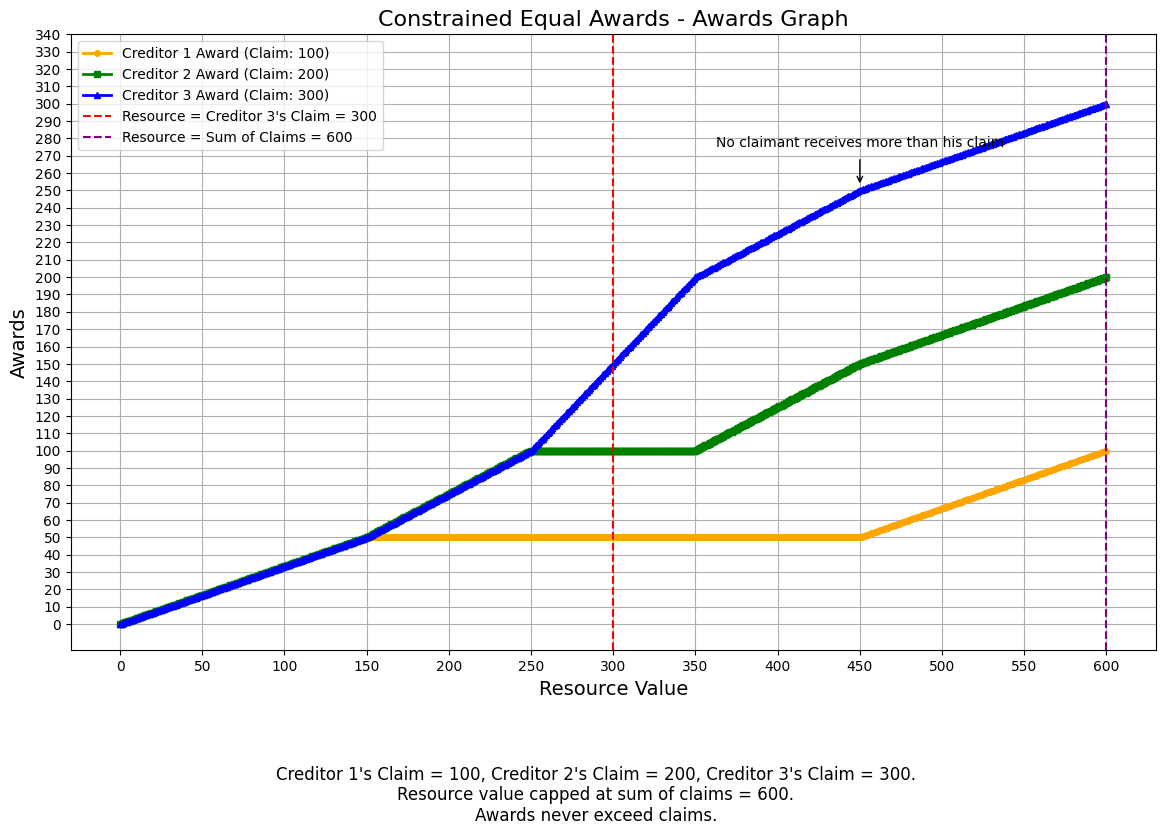

In [278]:
import matplotlib.pyplot as plt

def visualize_constrained_equal_awards_with_three(claim_1, claim_2, claim_3):
    max_asset = claim_1 + claim_2 + claim_3
    asset_values = list(range(0, max_asset + 1))

    allocations_1 = []
    allocations_2 = []
    allocations_3 = []
    
    for asset in asset_values:
        award_1, award_2, award_3 = concede_and_divide_generalized(asset, [claim_1, claim_2, claim_3])
        allocations_1.append(award_1)
        allocations_2.append(award_2)
        allocations_3.append(award_3)

    plt.figure(figsize=(14, 8))

    plt.plot(asset_values, allocations_1, label=f"Creditor 1 Award (Claim: {claim_1})",
             linewidth=2, color='orange', marker='o', markersize=4)
    plt.plot(asset_values, allocations_2, label=f"Creditor 2 Award (Claim: {claim_2})",
             linewidth=2, color='green', marker='s', markersize=4)
    plt.plot(asset_values, allocations_3, label=f"Creditor 3 Award (Claim: {claim_3})",
             linewidth=2, color='blue', marker='^', markersize=4)

    plt.axvline(claim_3, color="red", linestyle="--",
                label=f"Resource = Creditor 3's Claim = {claim_3}")
    plt.axvline(max_asset, color="purple", linestyle="--",
                label=f"Resource = Sum of Claims = {max_asset}")

    arrow_length = 15
    annotation_x = claim_3 + (max_asset - claim_3) / 2
    annotation_y = allocations_3[min(int(annotation_x), len(allocations_3)-1)]
    plt.annotate(
        "No claimant receives more than his claim", 
        xy=(annotation_x, annotation_y),
        xytext=(annotation_x, annotation_y + arrow_length + 10),
        arrowprops=dict(facecolor='black', arrowstyle="->", shrinkA=5, shrinkB=5),
        fontsize=10, color="black", ha="center"
    )

    plt.xticks(range(0, max_asset + 10, 50))
    y_max = max(claim_1, claim_2, claim_3)
    plt.yticks(range(0, y_max + 50, 10))

    plt.title("Constrained Equal Awards - Awards Graph", fontsize=16)
    plt.xlabel("Resource Value", fontsize=14)
    plt.ylabel("Awards", fontsize=14)
    plt.legend(loc="upper left")
    plt.grid(True)

    plt.figtext(0.5, -0.1,
                f"Creditor 1's Claim = {claim_1}, Creditor 2's Claim = {claim_2}, Creditor 3's Claim = {claim_3}.\n"
                f"Resource value capped at sum of claims = {max_asset}.\n"
                "Awards never exceed claims.",
                wrap=True, horizontalalignment='center', fontsize=12, color="black")

    plt.show()

visualize_constrained_equal_awards_with_three(claim_1=100, claim_2=200, claim_3=300)
